# Statistical Inference on "La Liga" and "Champions League" datasets
- Enrique Almazán Sánchez
- Víctor Miguel Álvarez Camarero
- Matías Nevado

## Sources

- La Liga Complete Dataset: https://www.kaggle.com/datasets/kishan305/la-liga-results-19952020
- UEFA Champions League 2016-2022 Data: sethttps://www.kaggle.com/datasets/cbxkgl/uefa-champions-league-2016-2022-data

## Introduction

Football, as one of the most popular sports worldwide, provides a rich and dynamic landscape for statistical analysis, will be analyzed through statistical inference within the context of two prestigious football competitions: "La Liga", the national spanish football, and the "Champions League", Europe's premier club competition.

The objective is to apply the principles learned in class throughout the course to real-world datasets as the oones mentioned. By analyzing data from these competitions,various aspects of the game will be studied, including team performance nationally and internationally, match outcomes and goal distribution between home and away as well as the relation between Real Madrid and comebacks.

The analysis will encompass a wide range of statistical techniques, including hypothesis testing, confidence intervals or regression analysis among others. By leveraging these tools, different patterns will be uncovered, as well as trends, and relationships within the datasets that can improve the understanding of football dynamics having different key areas of focus.

1. **Team Performance**

2. **Match Outcomes**

3. **Goal Distribution**


## Import dependencies

In [1]:
import utils as u

import pandas as pd
import numpy as np
from numpy import sqrt


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import statsmodels.api as sm
from scipy.stats import t, sem, norm, shapiro, wilcoxon, ttest_1samp, ttest_rel, mannwhitneyu, chi2_contingency, chi2
from statsmodels.stats.proportion import proportions_ztest


from bioinfokit.analys import stat

In [2]:
import warnings

# Desactivar todos los warnings
warnings.filterwarnings("ignore")

## Import Data

In [3]:
import pandas as pd
# Importing the LaLiga_Matches dataset
laliga_df = pd.read_csv("LaLiga_Matches.csv")

# Importing the UEFA Champions League 2016-2022 Data
ucl_df = pd.read_excel("UEFA Champions League 2016-2022 Data.xlsx", sheet_name='matches')

In [4]:
# Display the first few rows of the renamed and replaced La Liga dataset
laliga_df.head()

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,1995-96,02-09-1995,La Coruna,Valencia,3,0,H,2,0,H
1,1995-96,02-09-1995,Sp Gijon,Albacete,3,0,H,3,0,H
2,1995-96,03-09-1995,Ath Bilbao,Santander,4,0,H,2,0,H
3,1995-96,03-09-1995,Ath Madrid,Sociedad,4,1,H,1,1,D
4,1995-96,03-09-1995,Celta,Compostela,0,1,A,0,0,D


In [5]:
# Display the first few rows of the renamed and replaced Champions League dataset
ucl_df.head()

,MATCH_ID,SEASON,DATE_TIME,HOME_TEAM,AWAY_TEAM,STADIUM,HOME_TEAM_SCORE,AWAY_TEAM_SCORE,PENALTY_SHOOT_OUT,ATTENDANCE
0,mt1,2021-2022,15-SEP-21 08.00.00.000000000 PM,Manchester City,RB Leipzig,Etihad Stadium,6,3,0,38062
1,mt2,2021-2022,15-SEP-21 08.00.00.000000000 PM,Club Brugge KV,Paris Saint-Germain,Jan Breydel Stadion,1,1,0,27546
2,mt3,2021-2022,28-SEP-21 08.00.00.000000000 PM,Paris Saint-Germain,Manchester City,Parc des Princes,2,0,0,37350
3,mt4,2021-2022,28-SEP-21 08.00.00.000000000 PM,RB Leipzig,Club Brugge KV,Red Bull Arena,1,2,0,23500
4,mt5,2021-2022,19-OCT-21 05.45.00.000000000 PM,Club Brugge KV,Manchester City,Jan Breydel Stadion,1,5,0,24915


## Previous Requirements

### Filter La Liga dataset

As the Champions League dataset is from 2015-2016 season to 2021-2022 season, then for congruence La Liga dataset will be filtered to comprehend only those seasons.

In [6]:
# Extract the starting year from the "Season" column
laliga_df['Start_Year'] = laliga_df['Season'].str.extract(r'(\d{4})').astype(int)

# Filter the dataset for seasons between 2016 and 2022
f_laliga_df = laliga_df[(laliga_df['Start_Year'] >= 2016) & (laliga_df['Start_Year'] <= 2022)]

# Drop the temporary "Start_Year" column
f_laliga_df.drop(columns=['Start_Year'], inplace=True)

# Print the shape of the filtered dataset to verify
print("Shape of filtered La Liga dataset:", f_laliga_df.shape)

# Display the first few rows of the filtered dataset
print("\nFirst few rows of filtered La Liga dataset:")
f_laliga_df.head()

Shape of filtered La Liga dataset: (2660, 10)

First few rows of filtered La Liga dataset:


,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
8144,2016-17,19-08-2016,La Coruna,Eibar,2,1,H,0,0,D
8145,2016-17,19-08-2016,Malaga,Osasuna,1,1,D,0,0,D
8146,2016-17,20-08-2016,Barcelona,Betis,6,2,H,3,1,H
8147,2016-17,20-08-2016,Granada,Villarreal,1,1,D,0,0,D
8148,2016-17,20-08-2016,Sevilla,Espanol,6,4,H,3,3,D


### Renaming and Replacing

In order for both datasets to coincide and making possible the intersection between both, the columns as well as the name of some teams (those who plays both, the national league and the UCL) will be renamed or replaced respectively.

In [7]:
# Rename the columns of La Liga dataset
col_rename_laliga = {
    'Date': 'DATE_TIME', 
    "HomeTeam": "HOME_TEAM", 
    "AwayTeam" : "AWAY_TEAM"
}

# Rename the columns of Champions League dataset
col_rename_ucl = {
    'HOME_TEAM_SCORE': 'FTHG',
    'AWAY_TEAM_SCORE': 'FTAG'
}

# Renaming
laliga_df.rename(columns=col_rename_laliga, inplace=True)
f_laliga_df.rename(columns=col_rename_laliga, inplace=True)
ucl_df.rename(columns=col_rename_ucl, inplace=True)

In [8]:
# Replace team names
team_replacements = {
    'Ath Madrid': 'Atlético Madrid',
    'Barcelona': 'FC Barcelona',
    'Sevilla': 'Sevilla FC',
    'Valencia': 'Valencia CF',
    'Villarreal': 'Villarreal CF'
}

laliga_df['HOME_TEAM'] = laliga_df['HOME_TEAM'].replace(team_replacements)
laliga_df['AWAY_TEAM'] = laliga_df['AWAY_TEAM'].replace(team_replacements)

f_laliga_df['HOME_TEAM'] = f_laliga_df['HOME_TEAM'].replace(team_replacements)
f_laliga_df['AWAY_TEAM'] = f_laliga_df['AWAY_TEAM'].replace(team_replacements)

### Date Time Column

Ensuring that the column regarding the date time of each of the matches is datetime data type is paramount.

In [9]:
# Ensure DATE_TIME column is datetime type
laliga_df['DATE_TIME'] = pd.to_datetime(laliga_df['DATE_TIME'], dayfirst=True)
f_laliga_df['DATE_TIME'] = pd.to_datetime(f_laliga_df['DATE_TIME'], dayfirst=True)
ucl_df['DATE_TIME'] = pd.to_datetime(ucl_df['DATE_TIME'], format='%d-%b-%y %I.%M.%S.%f %p')

## Exploratory Data Analysis

First of all, the first few raws of both datasets will again be displayed, which will also help for confirming that the previous requirements are correctly performed.

In [10]:
# Display the first few rows of the renamed and replaced La Liga dataset
laliga_df.head()

,Season,DATE_TIME,HOME_TEAM,AWAY_TEAM,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Start_Year
0,1995-96,1995-09-02,La Coruna,Valencia CF,3,0,H,2,0,H,1995
1,1995-96,1995-09-02,Sp Gijon,Albacete,3,0,H,3,0,H,1995
2,1995-96,1995-09-03,Ath Bilbao,Santander,4,0,H,2,0,H,1995
3,1995-96,1995-09-03,Atlético Madrid,Sociedad,4,1,H,1,1,D,1995
4,1995-96,1995-09-03,Celta,Compostela,0,1,A,0,0,D,1995


In [11]:
# Display the first few rows of the renamed and replaced Champions League dataset
ucl_df.head()

,MATCH_ID,SEASON,DATE_TIME,HOME_TEAM,AWAY_TEAM,STADIUM,FTHG,FTAG,PENALTY_SHOOT_OUT,ATTENDANCE
0,mt1,2021-2022,2021-09-15 20:00:00,Manchester City,RB Leipzig,Etihad Stadium,6,3,0,38062
1,mt2,2021-2022,2021-09-15 20:00:00,Club Brugge KV,Paris Saint-Germain,Jan Breydel Stadion,1,1,0,27546
2,mt3,2021-2022,2021-09-28 20:00:00,Paris Saint-Germain,Manchester City,Parc des Princes,2,0,0,37350
3,mt4,2021-2022,2021-09-28 20:00:00,RB Leipzig,Club Brugge KV,Red Bull Arena,1,2,0,23500
4,mt5,2021-2022,2021-10-19 17:45:00,Club Brugge KV,Manchester City,Jan Breydel Stadion,1,5,0,24915


### Basic EDA for La Liga dataset

#### Shape

In [12]:
print("Shape:", laliga_df.shape)

Shape: (10883, 11)


#### Basic Statistics

In [13]:
print("\nBasic Statistics:")
print(laliga_df.describe())


Basic Statistics:
                           DATE_TIME          FTHG          FTAG  \
count                          10883  10883.000000  10883.000000   
mean   2009-06-12 10:58:08.523385088      1.553340      1.116971   
min              1995-09-02 00:00:00      0.000000      0.000000   
25%              2002-03-03 00:00:00      1.000000      0.000000   
50%              2009-05-03 00:00:00      1.000000      1.000000   
75%              2016-08-28 00:00:00      2.000000      2.000000   
max              2023-10-02 00:00:00     10.000000      8.000000   
std                              NaN      1.303854      1.114065   

               HTHG          HTAG    Start_Year  
count  10883.000000  10883.000000  10883.000000  
mean       0.687586      0.484977   2008.409354  
min        0.000000      0.000000   1995.000000  
25%        0.000000      0.000000   2001.000000  
50%        0.000000      0.000000   2008.000000  
75%        1.000000      1.000000   2016.000000  
max        6.00000

#### Data Types

In [14]:
print("\nData Types:")
print(laliga_df.dtypes)


Data Types:
Season                object
DATE_TIME     datetime64[ns]
HOME_TEAM             object
AWAY_TEAM             object
FTHG                   int64
FTAG                   int64
FTR                   object
HTHG                   int64
HTAG                   int64
HTR                   object
Start_Year             int32
dtype: object


#### Missing values

In [15]:
print("\nMissing Values:")
print(laliga_df.isnull().sum())


Missing Values:
Season        0
DATE_TIME     0
HOME_TEAM     0
AWAY_TEAM     0
FTHG          0
FTAG          0
FTR           0
HTHG          0
HTAG          0
HTR           0
Start_Year    0
dtype: int64


### Champions League dataset

#### Shape

In [16]:
print("Shape:", ucl_df.shape)

Shape: (744, 10)


#### Basic Statistics

In [17]:
print("\nBasic Statistics:")
print(ucl_df.describe())


Basic Statistics:
                           DATE_TIME        FTHG        FTAG  \
count                            744  744.000000  744.000000   
mean   2019-06-03 18:27:47.338709504    1.681452    1.381720   
min              2016-09-13 19:45:00    0.000000    0.000000   
25%              2017-11-01 19:45:00    1.000000    0.000000   
50%              2019-05-04 20:00:00    1.000000    1.000000   
75%              2020-11-27 07:28:45    2.250000    2.000000   
max              2022-05-28 20:35:00    8.000000    8.000000   
std                              NaN    1.465394    1.345743   

       PENALTY_SHOOT_OUT    ATTENDANCE  
count              744.0    744.000000  
mean                 0.0  35786.936828  
min                  0.0      0.000000  
25%                  0.0  16592.500000  
50%                  0.0  38083.500000  
75%                  0.0  52258.750000  
max                  0.0  98299.000000  
std                  0.0  24000.039185  


#### Data Types

In [18]:
print("\nData Types:")
print(ucl_df.dtypes)


Data Types:
MATCH_ID                     object
SEASON                       object
DATE_TIME            datetime64[ns]
HOME_TEAM                    object
AWAY_TEAM                    object
STADIUM                      object
FTHG                          int64
FTAG                          int64
PENALTY_SHOOT_OUT             int64
ATTENDANCE                    int64
dtype: object


#### Missing values

In [19]:
print("\nMissing Values:")
print(ucl_df.isnull().sum())


Missing Values:
MATCH_ID             0
SEASON               0
DATE_TIME            0
HOME_TEAM            0
AWAY_TEAM            0
STADIUM              0
FTHG                 0
FTAG                 0
PENALTY_SHOOT_OUT    0
ATTENDANCE           0
dtype: int64


## Hypothesis

### 1) Is there a difference between number of goals scored at home matches and away matches?

This research question seeks to investigate whether there is a statistically significant disparity in the number of goals scored by football teams when playing at home compared to playing away. Understanding this difference is crucial for teams and coaches to develop effective match strategies based on different conditions. Moreover, fans and analysts could be interested to discern if there exists a home-field advantage phenomenon and its impact on match outcomes.

For this hypothesis both datasets are going to be used, using the filtered La Liga dataset in order for having coherence.

#### EDA


#### Obtaining data of interest

Two types of tests are performed:
   - First we perform a visual normality test, and a statistical one, using Kolmogorov-Smirnov test since we have a big dataset (otherwise Saphiro test would be used).
   - If the result is that we do not have normally distributed data, we use Wilcoxon test to determine wether there is a significant difference between both groups. Finally by looking at the result we know which one is higher.

#### Visual Normality Test

#### Hypothesis testing

Now the hypothesis testing is stated, having:

- **Null Hypothesis (H0)**: There is no difference between goals scored at home games and away games.
- **Alternative Hypothesis (H1)**: There is a difference between goals scored at home games and away games.

$$H_0: μ_{\text{home}} = μ_{\text{away}} \quad\text{vs}\quad H_1: μ_{\text{home}} \neq μ_{\text{away}}$$

Which can also be written as:

$$H_0: μ = 0 \quad\text{vs}\quad H_1: μ \neq 0$$

Having,

$$μ = μ_{\text{home}} - μ_{\text{away}}$$

It is worth noting that μ represents the differences of both means, goals scored home ($μ_{\text{home}}$) and goals score away ($μ_{\text{away}}$).

### 2) Is the national league performance affected by the european competition?

This research question aims to explore the potential influence of participation in the prestigious Champions League on teams' performances in their respective national leagues. This question is pertinent in the football community as it addresses the broader impact of competing in multiple competitions concurrently, including considerations of player fatigue, squad rotation, and psychological factors. Moreover, stakeholders such as club owners, sponsors, and fans are interested in understanding the trade-offs between domestic success and continental glory.

For this hypothesis both datasets are going to be used, using the filtered La Liga dataset in order for having coherence.


#### EDA

In [20]:
# Identify common teams
common_teams = set(laliga_df['HOME_TEAM']).intersection(set(ucl_df['HOME_TEAM']))

In [21]:
# Create a DataFrame to store the average results of each team
results_laliga = pd.DataFrame(columns=['Team', 'Win %', 'Draw %', 'Loss %'])
results_ucl = pd.DataFrame(columns=['Team', 'Win %', 'Draw %', 'Loss %'])

In [22]:
# Iterate over each team
for team in common_teams:
    # Get the years in which the team participated in both La Liga and UEFA Champions League
    common_years = set(laliga_df[laliga_df['HOME_TEAM'] == team]['DATE_TIME'].dt.year).intersection(set(ucl_df[ucl_df['HOME_TEAM'] == team]['DATE_TIME'].dt.year))
    
    # Calculate average percentages for each year
    average_liga_win_percentage = 0
    average_liga_draw_percentage = 0
    average_liga_loss_percentage = 0
    average_ucl_win_percentage = 0
    average_ucl_draw_percentage = 0
    average_ucl_loss_percentage = 0
    
    num_years = len(common_years)
    for year in common_years:
       # Calculate percentages for La Liga
        la_liga_win_percentage, la_liga_draw_percentage, la_liga_loss_percentage = u.calculator(laliga_df, team, year, percentages=True)
        average_liga_win_percentage += la_liga_win_percentage
        average_liga_draw_percentage += la_liga_draw_percentage
        average_liga_loss_percentage += la_liga_loss_percentage
        
        # Calculate percentages for UEFA Champions League
        ucl_win_percentage, ucl_draw_percentage, ucl_loss_percentage = u.calculator(ucl_df, team, year, percentages=True)
        average_ucl_win_percentage += ucl_win_percentage
        average_ucl_draw_percentage += ucl_draw_percentage
        average_ucl_loss_percentage += ucl_loss_percentage
    
    # Calculate average percentages
    average_liga_win_percentage /= num_years
    average_liga_draw_percentage /= num_years
    average_liga_loss_percentage /= num_years
    average_ucl_win_percentage /= num_years
    average_ucl_draw_percentage /= num_years
    average_ucl_loss_percentage /= num_years
    
    # Append the results to the DataFrame
    results_laliga = pd.concat([results_laliga, pd.DataFrame({'Team': [team], 'Win %': [average_liga_win_percentage], 'Draw %': [average_liga_draw_percentage], 'Loss %': [average_liga_loss_percentage]})], ignore_index=True)
    results_ucl = pd.concat([results_ucl, pd.DataFrame({'Team': [team], 'Win %': [average_ucl_win_percentage], 'Draw %': [average_ucl_draw_percentage], 'Loss %': [average_ucl_loss_percentage]})], ignore_index=True)

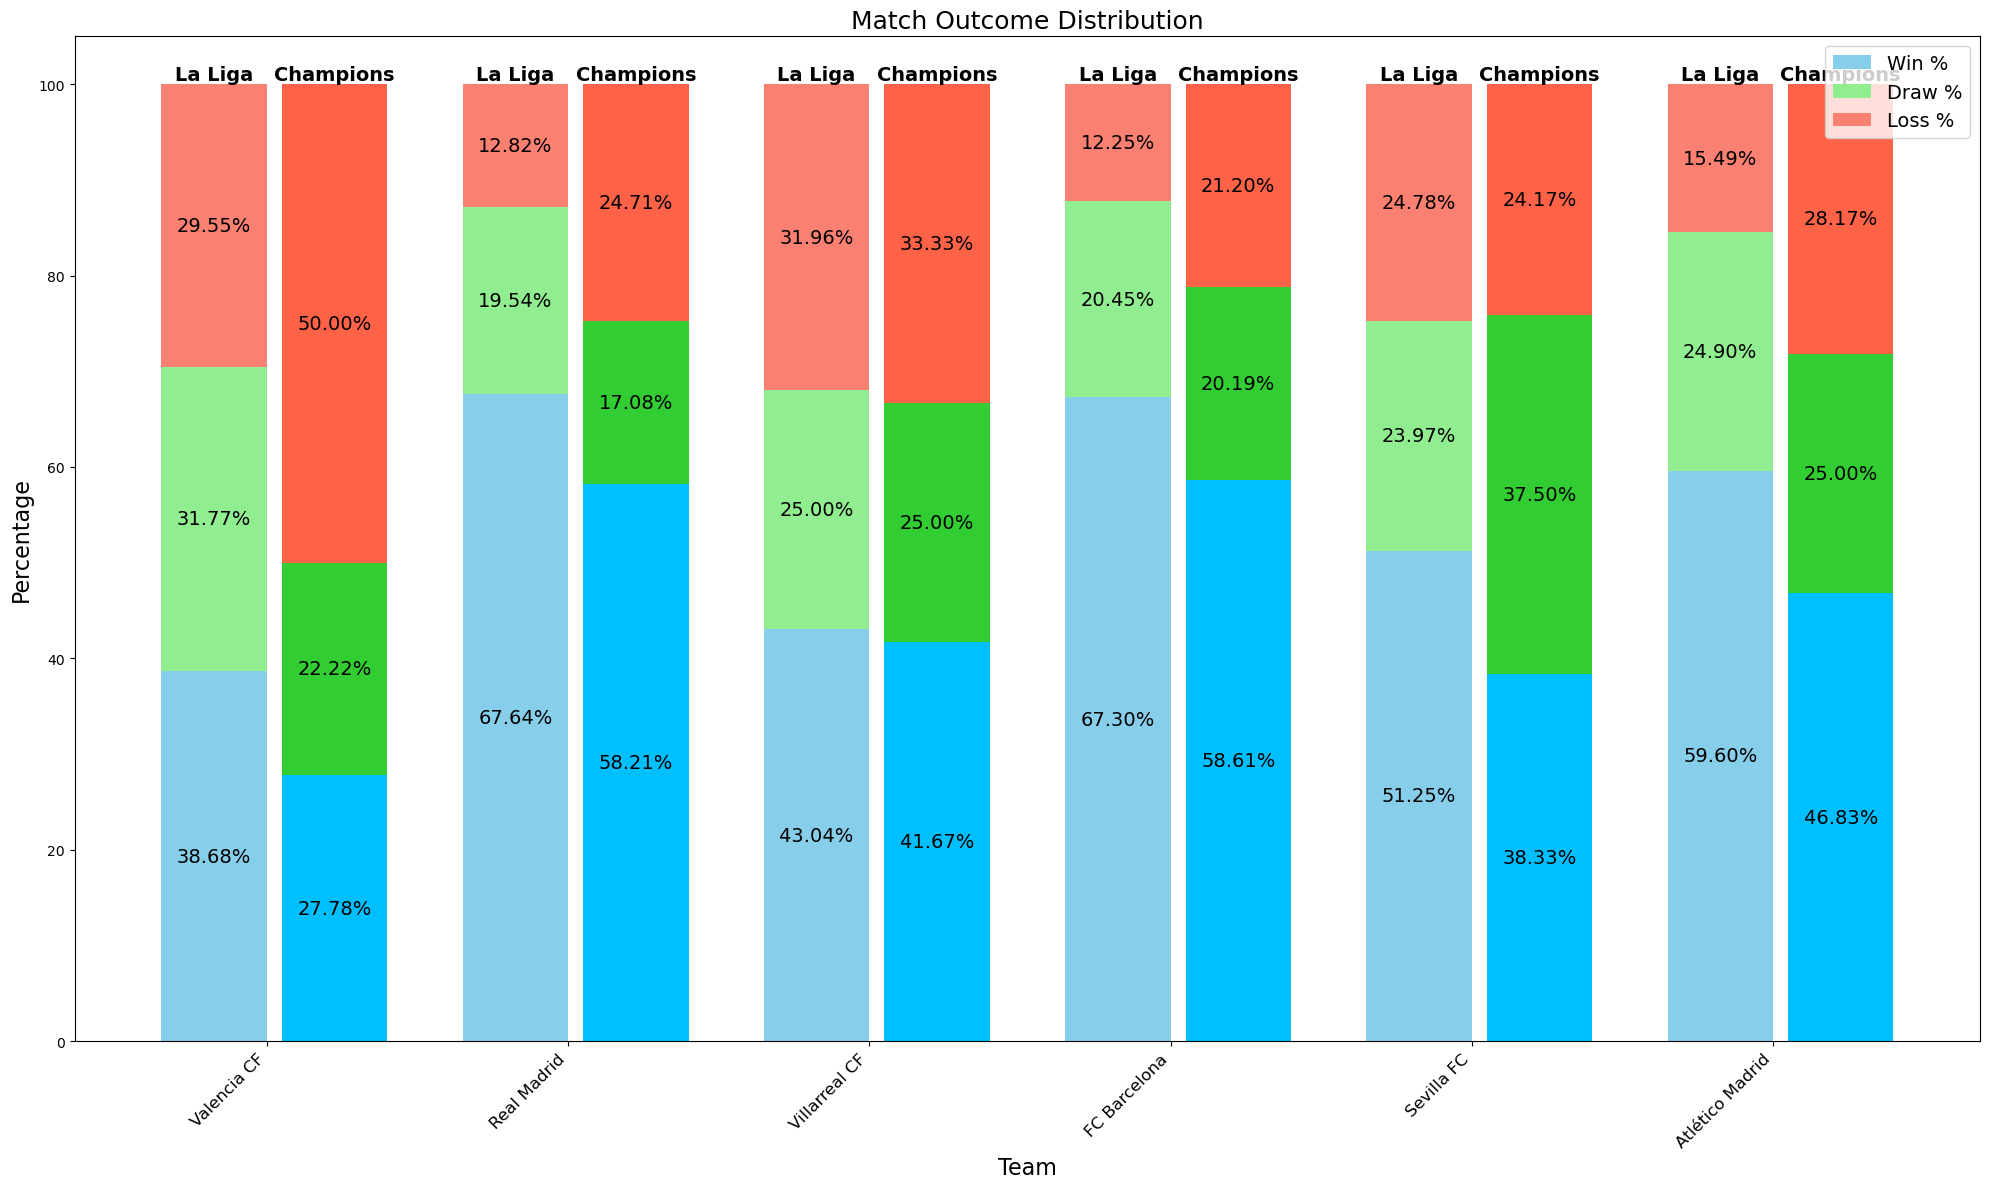

In [23]:
# Plot the results
plt.figure(figsize=(20, 12))
bar_width = 0.35
index = np.arange(len(results_laliga))

# Plot La Liga results
plt.bar(index, results_laliga['Win %'], color='skyblue', label='Win %', width=bar_width)
plt.bar(index, results_laliga['Draw %'], color='lightgreen', label='Draw %', width=bar_width, bottom=results_laliga['Win %'])
plt.bar(index, results_laliga['Loss %'], color='salmon', label='Loss %', width=bar_width, bottom=results_laliga['Win %'] + results_laliga['Draw %'])

# Plot UEFA Champions League results
plt.bar(index + bar_width + 0.05, results_ucl['Win %'], color='deepskyblue', width=bar_width)
plt.bar(index + bar_width + 0.05, results_ucl['Draw %'], color='limegreen', width=bar_width, bottom=results_ucl['Win %'])
plt.bar(index + bar_width + 0.05, results_ucl['Loss %'], color='tomato', width=bar_width, bottom=results_ucl['Win %'] + results_ucl['Draw %'])

# Add percentage labels on top of each bar for La Liga
for i, row in results_laliga.iterrows():
    plt.text(i, row['Win %'] / 2, f'{row["Win %"]:.2f}%', ha='center', va='center', color='black', fontsize=14)
    plt.text(i, row['Win %'] + row['Draw %'] / 2, f'{row["Draw %"]:.2f}%', ha='center', va='center', color='black', fontsize=14)
    plt.text(i, row['Win %'] + row['Draw %'] + row['Loss %'] / 2, f'{row["Loss %"]:.2f}%', ha='center', va='center', color='black', fontsize=14)
    plt.text(i, row['Win %'] + row['Draw %'] + row['Loss %'] + 1, 'La Liga', ha='center', va='center', color='black', fontsize=14, fontweight='bold')

# Add percentage labels on top of each bar for UEFA Champions League
for i, row in results_ucl.iterrows():
    plt.text(i + bar_width + 0.05, row['Win %'] / 2, f'{row["Win %"]:.2f}%', ha='center', va='center', color='black', fontsize=14)
    plt.text(i + bar_width + 0.05, row['Win %'] + row['Draw %'] / 2, f'{row["Draw %"]:.2f}%', ha='center', va='center', color='black', fontsize=14)
    plt.text(i + bar_width + 0.05, row['Win %'] + row['Draw %'] + row['Loss %'] / 2, f'{row["Loss %"]:.2f}%', ha='center', va='center', color='black', fontsize=14)
    plt.text(i + bar_width + 0.05, row['Win %'] + row['Draw %'] + row['Loss %'] + 1, 'Champions', ha='center', va='center', color='black', fontsize=14, fontweight='bold')

# Adjust x-axis ticks and labels
plt.xlabel('Team', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.title('Match Outcome Distribution', fontsize=18)
plt.xticks(index + bar_width / 2, results_laliga['Team'], rotation=45, ha='right', fontsize=12)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

In [24]:
# Calculate the average points for each team in both competitions
average_points_la_liga = {}
average_points_ucl = {}
for team in common_teams:
    # Get the years in which the team participated in both La Liga and UEFA Champions League
    common_years = set(laliga_df[laliga_df['HOME_TEAM'] == team]['DATE_TIME'].dt.year).intersection(set(ucl_df[ucl_df['HOME_TEAM'] == team]['DATE_TIME'].dt.year))
    
    points_list_la_liga = []
    points_list_ucl = []
    for year in common_years:
        # Calculate points for La Liga
        points_laliga = u.calculator(laliga_df, team, year, points=True)
        points_list_la_liga.append(points_laliga)
        
        # Calculate points for UEFA Champions League
        points_ucl = u.calculator(ucl_df, team, year, points=True)
        points_list_ucl.append(points_ucl)
    
    # Calculate average points for the team in La Liga
    average_points_la_liga[team] = sum(points_list_la_liga) / len(common_years)
    
    # Calculate average points for the team in UEFA Champions League
    average_points_ucl[team] = sum(points_list_ucl) / len(common_years)

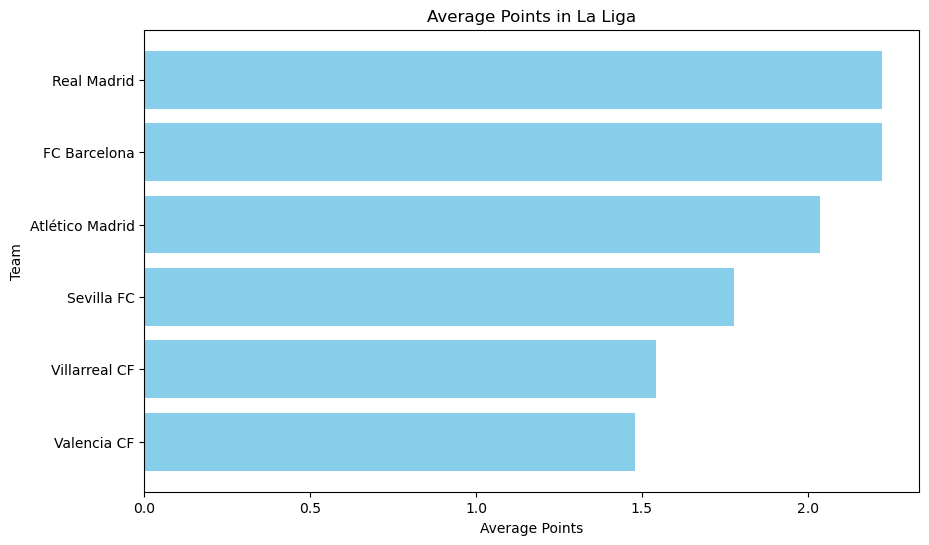

In [25]:
# Sorting the teams by the point means in La Liga from higher to lower
sorted_average_points_la_liga = dict(sorted(average_points_la_liga.items(), key=lambda item: item[1], reverse=True))
teams_la_liga = list(sorted_average_points_la_liga.keys())
points_la_liga = list(sorted_average_points_la_liga.values())

# Crear la gráfica de barras para La Liga
plt.figure(figsize=(10, 6))
plt.barh(teams_la_liga, points_la_liga, color='skyblue')
plt.xlabel('Average Points')
plt.ylabel('Team')
plt.title('Average Points in La Liga')
plt.gca().invert_yaxis()  # Invertir el eje y para que el equipo con más puntos esté arriba
plt.show()

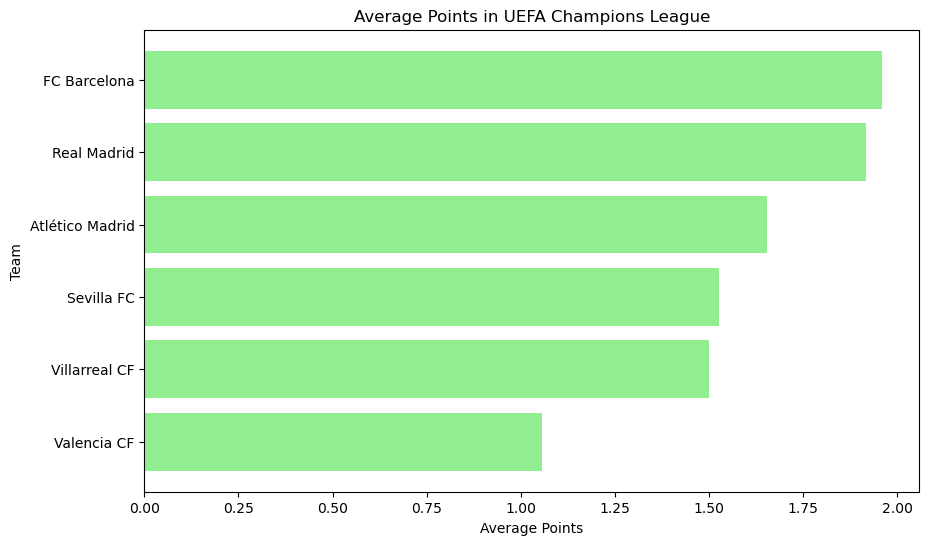

In [26]:
# Sorting the teams by the point means in Champions League from higher to lower
sorted_average_points_ucl = dict(sorted(average_points_ucl.items(), key=lambda item: item[1], reverse=True))
teams_ucl = list(sorted_average_points_ucl.keys())
points_ucl = list(sorted_average_points_ucl.values())

# Crear la gráfica de barras para la UEFA Champions League
plt.figure(figsize=(10, 6))
plt.barh(teams_ucl, points_ucl, color='lightgreen')
plt.xlabel('Average Points')
plt.ylabel('Team')
plt.title('Average Points in UEFA Champions League')
plt.gca().invert_yaxis()  # Invertir el eje y para que el equipo con más puntos esté arriba
plt.show()

#### Obtaining data of interest

In [27]:
# 1. Sort both DataFrames by date
f_laliga_df = f_laliga_df.sort_values(by='DATE_TIME')
ucl_df = ucl_df.sort_values(by='DATE_TIME')

# 2. Create a list of dates for UCL matches
ucl_dates = ucl_df['DATE_TIME'].tolist()

# 3. Iterate through La Liga matches and check if there is a UCL match between La Liga matches
ucl_weeks = []
for idx, row in f_laliga_df.iterrows():
    current_date = row['DATE_TIME']
    #print(current_date)
    # Check if there is a UCL match between La Liga matches
    if any(current_date < date for date in ucl_dates):
        ucl_weeks.append(1)  # Indicate there are UCL matches in this week
    else:
        ucl_weeks.append(0)  # Indicate there are no UCL matches in this week

# 4. Create a new column in the La Liga DataFrame to indicate if there are UCL matches in each week
f_laliga_df['UCL_match'] = ucl_weeks

# 5. Get a list of teams that have participated in both competitions
common_teams = set(f_laliga_df['HOME_TEAM']).intersection(set(ucl_df['HOME_TEAM']))

# 6. Filter La Liga and UCL matches to include only those of common teams
laliga_with_common_teams = f_laliga_df[(f_laliga_df['HOME_TEAM'].isin(common_teams)) | (f_laliga_df['AWAY_TEAM'].isin(common_teams))]
ucl_with_common_teams = ucl_df[(ucl_df['HOME_TEAM'].isin(common_teams)) | (ucl_df['AWAY_TEAM'].isin(common_teams))]

# 7. Split La Liga data into weeks with and without UCL matches
laliga_with_ucl = laliga_with_common_teams[laliga_with_common_teams['UCL_match'] == 1]
laliga_without_ucl = laliga_with_common_teams[laliga_with_common_teams['UCL_match'] == 0]

In [28]:
laliga_with_ucl

,Season,DATE_TIME,HOME_TEAM,AWAY_TEAM,FTHG,FTAG,FTR,HTHG,HTAG,HTR,UCL_match
8146,2016-17,2016-08-20,FC Barcelona,Betis,6,2,H,3,1,H,1
8147,2016-17,2016-08-20,Granada,Villarreal CF,1,1,D,0,0,D,1
8148,2016-17,2016-08-20,Sevilla FC,Espanol,6,4,H,3,3,D,1
8149,2016-17,2016-08-21,Atlético Madrid,Alaves,1,1,D,0,0,D,1
8150,2016-17,2016-08-21,Sociedad,Real Madrid,0,3,A,0,2,A,1
...,...,...,...,...,...,...,...,...,...,...,...
10414,2021-22,2022-05-20,Real Madrid,Betis,0,0,D,0,0,D,1
10416,2021-22,2022-05-21,Valencia CF,Celta,2,0,H,1,0,H,1
10421,2021-22,2022-05-22,FC Barcelona,Villarreal CF,0,2,A,0,1,A,1
10422,2021-22,2022-05-22,Sevilla FC,Ath Bilbao,1,0,H,0,0,D,1


In [29]:
laliga_without_ucl

,Season,DATE_TIME,HOME_TEAM,AWAY_TEAM,FTHG,FTAG,FTR,HTHG,HTAG,HTR,UCL_match
10424,2022-23,2022-08-12,Osasuna,Sevilla FC,2,1,H,1,1,D,0
10426,2022-23,2022-08-13,Valladolid,Villarreal CF,0,3,A,0,0,D,0
10427,2022-23,2022-08-13,FC Barcelona,Vallecano,0,0,D,0,0,D,0
10430,2022-23,2022-08-14,Almeria,Real Madrid,1,2,A,1,0,H,0
10429,2022-23,2022-08-14,Valencia CF,Girona,1,0,H,1,0,H,0
...,...,...,...,...,...,...,...,...,...,...,...
10799,2022-23,2023-06-04,Betis,Valencia CF,1,1,D,1,0,H,0
10800,2022-23,2023-06-04,Celta,FC Barcelona,2,1,H,1,0,H,0
10798,2022-23,2023-06-04,Villarreal CF,Atlético Madrid,2,2,D,1,1,D,0
10796,2022-23,2023-06-04,Real Madrid,Ath Bilbao,1,1,D,0,0,D,0


In [30]:
# Initialize an empty list to store individual team results DataFrames
team_results = []

# Iterate over common_teams and calculate results for each team
for team in common_teams:
    # Get the years in which the team participated in both La Liga with UCL and La Liga without UCL
    ucl_years = set(laliga_with_ucl[laliga_with_ucl['HOME_TEAM'] == team]['DATE_TIME'].dt.year)
    
    # Calculate the average percentages for La Liga with UCL
    liga_with_ucl_win_percentage, liga_with_ucl_draw_percentage, liga_with_ucl_loss_percentage = u.calculator(laliga_with_ucl, team, ucl_years, percentages=True)
    
    # Calculate the average percentages for La Liga without UCL
    liga_without_ucl_win_percentage, liga_without_ucl_draw_percentage, liga_without_ucl_loss_percentage = u.calculator(laliga_without_ucl, team, ucl_years, percentages=True)
    
    # Create a DataFrame for the current team's results
    team_df = pd.DataFrame({'Team': [team],
                            'Win % with UCL': [liga_with_ucl_win_percentage],
                            'Draw % with UCL': [liga_with_ucl_draw_percentage],
                            'Loss % with UCL': [liga_with_ucl_loss_percentage],
                            'Win % without UCL': [liga_without_ucl_win_percentage],
                            'Draw % without UCL': [liga_without_ucl_draw_percentage],
                            'Loss % without UCL': [liga_without_ucl_loss_percentage]})
    
    # Append the team DataFrame to the list
    team_results.append(team_df)

# Concatenate all individual team results DataFrames into a single DataFrame
all_teams_results = pd.concat(team_results, ignore_index=True)

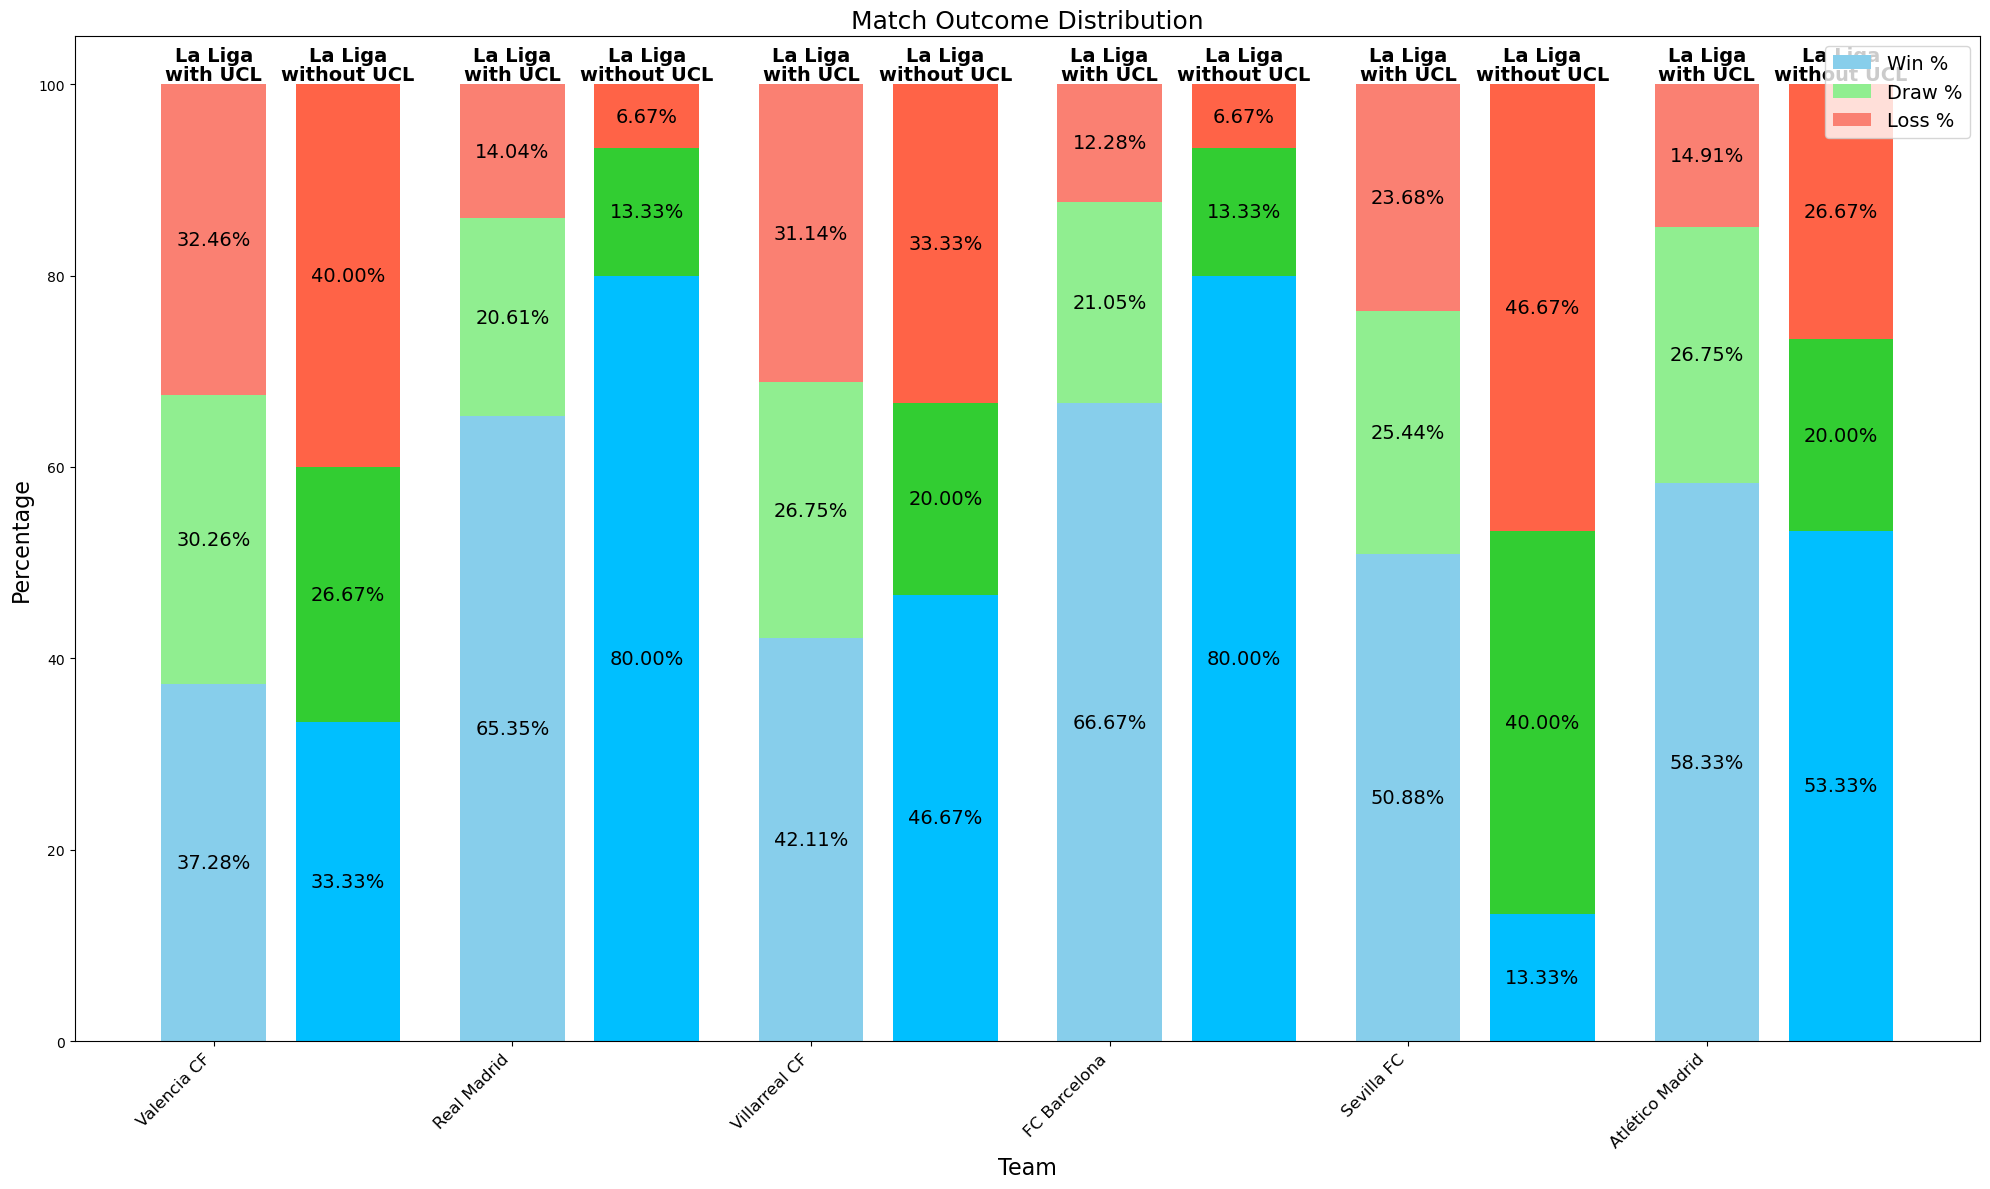

In [31]:
# Plot the results
plt.figure(figsize=(20, 12))
bar_width = 0.35
index = np.arange(len(all_teams_results))

# Plot La Liga results with UCL
plt.bar(index, all_teams_results['Win % with UCL'], color='skyblue', label='Win %', width=bar_width)
plt.bar(index, all_teams_results['Draw % with UCL'], color='lightgreen', label='Draw %', width=bar_width, bottom=all_teams_results['Win % with UCL'])
plt.bar(index, all_teams_results['Loss % with UCL'], color='salmon', label='Loss %', width=bar_width, bottom=all_teams_results['Win % with UCL'] + all_teams_results['Draw % with UCL'])

# Plot La Liga results without UCL
plt.bar(index + bar_width + 0.1, all_teams_results['Win % without UCL'], color='deepskyblue', width=bar_width)
plt.bar(index + bar_width + 0.1, all_teams_results['Draw % without UCL'], color='limegreen', width=bar_width, bottom=all_teams_results['Win % without UCL'])
plt.bar(index + bar_width + 0.1, all_teams_results['Loss % without UCL'], color='tomato', width=bar_width, bottom=all_teams_results['Win % without UCL'] + all_teams_results['Draw % without UCL'])

# Add percentage labels on top of each bar for La Liga with UCL
for i, row in all_teams_results.iterrows():
    plt.text(i, row['Win % with UCL'] / 2, f'{row["Win % with UCL"]:.2f}%', ha='center', va='center', color='black', fontsize=14)
    plt.text(i, row['Win % with UCL'] + row['Draw % with UCL'] / 2, f'{row["Draw % with UCL"]:.2f}%', ha='center', va='center', color='black', fontsize=14)
    plt.text(i, row['Win % with UCL'] + row['Draw % with UCL'] + row['Loss % with UCL'] / 2, f'{row["Loss % with UCL"]:.2f}%', ha='center', va='center', color='black', fontsize=14)
    plt.text(i, row['Win % with UCL'] + row['Draw % with UCL'] + row['Loss % with UCL'] + 1, 'with UCL', ha='center', va='center', color='black', fontsize=14, fontweight='bold')
    plt.text(i, row['Win % with UCL'] + row['Draw % with UCL'] + row['Loss % with UCL'] + 3, 'La Liga', ha='center', va='center', color='black', fontsize=14, fontweight='bold')

# Add percentage labels on top of each bar for La Liga without UCL
for i, row in all_teams_results.iterrows():
    plt.text(i + bar_width + 0.1, row['Win % without UCL'] / 2, f'{row["Win % without UCL"]:.2f}%', ha='center', va='center', color='black', fontsize=14)
    plt.text(i + bar_width + 0.1, row['Win % without UCL'] + row['Draw % without UCL'] / 2, f'{row["Draw % without UCL"]:.2f}%', ha='center', va='center', color='black', fontsize=14)
    plt.text(i + bar_width + 0.1, row['Win % without UCL'] + row['Draw % without UCL'] + row['Loss % without UCL'] / 2, f'{row["Loss % without UCL"]:.2f}%', ha='center', va='center', color='black', fontsize=14)
    plt.text(i + bar_width + 0.1, row['Win % without UCL'] + row['Draw % without UCL'] + row['Loss % without UCL'] + 1, 'without UCL', ha='center', va='center', color='black', fontsize=14, fontweight='bold')
    plt.text(i + bar_width + 0.1, row['Win % without UCL'] + row['Draw % without UCL'] + row['Loss % without UCL'] + 3, 'La Liga', ha='center', va='center', color='black', fontsize=14, fontweight='bold')


# Adjust x-axis ticks and labels
plt.xlabel('Team', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.title('Match Outcome Distribution', fontsize=18)
plt.xticks(index, all_teams_results['Team'], rotation=45, ha='right', fontsize=12)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

In [32]:
# Plot the bar graphs for each common team
for team in common_teams:
    # Get the years in which the team participated in both La Liga with UCL and La Liga without UCL
    ucl_years = set(laliga_with_ucl[laliga_with_ucl['HOME_TEAM'] == team]['DATE_TIME'].dt.year)
    
    # Calculate the average points for La Liga with UCL
    liga_with_ucl_average_points = u.calculator(laliga_with_ucl, team, ucl_years, points=True)
    
    # Calculate the average points for La Liga without UCL
    liga_without_ucl_average_points = u.calculator(laliga_without_ucl, team, ucl_years, points=True)
    
    print(f'{team}: Average Points (with UCL): {liga_with_ucl_average_points:.2f}, Average Points (without UCL): {liga_without_ucl_average_points:.2f}')

Valencia CF: Average Points (with UCL): 1.42, Average Points (without UCL): 1.27
Real Madrid: Average Points (with UCL): 2.17, Average Points (without UCL): 2.53
Villarreal CF: Average Points (with UCL): 1.53, Average Points (without UCL): 1.60
FC Barcelona: Average Points (with UCL): 2.21, Average Points (without UCL): 2.53
Sevilla FC: Average Points (with UCL): 1.78, Average Points (without UCL): 0.80
Atlético Madrid: Average Points (with UCL): 2.02, Average Points (without UCL): 1.80


#### Visual Normality Test

In [33]:
# Example data
teams = list(average_points_la_liga.keys())  # Use the teams from your data
laliga_win_rate = np.array(list(average_points_la_liga.values()))  # Normal win rates in La Liga according to points
ucl_win_rate = np.array(list(average_points_ucl.values()))  # Win rates in La Liga with UCL matches according to points

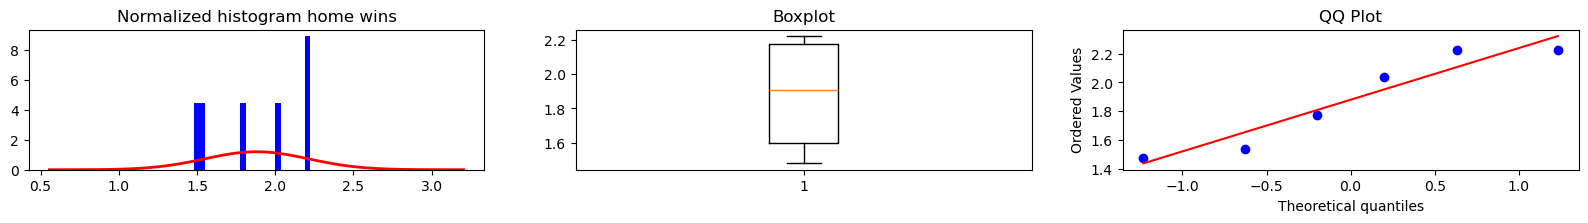

Shapiro-Wilk Statistic (Normal Win Rates): 0.8794198036193848
p-value (Normal Win Rates): 0.2664034366607666
The data follows a normal distribution.


In [34]:
# For La Liga
u.visual_normality_test(laliga_win_rate, 'blue')

# Shapiro-Wilk test
sw_statistic, p_value = shapiro(laliga_win_rate)

print('Shapiro-Wilk Statistic (Normal Win Rates):', sw_statistic)
print('p-value (Normal Win Rates):', p_value)
if p_value > 0.05:
    print('The data follows a normal distribution.')
else:
    print('The data does not follow a normal distribution.')

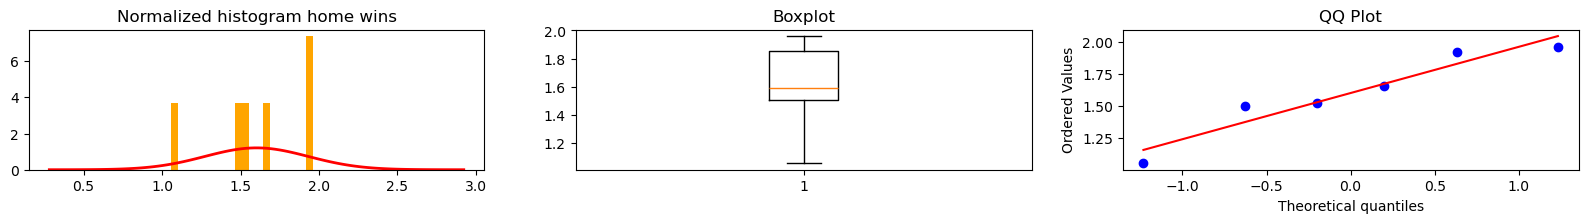

Shapiro-Wilk Statistic (Win Rates with Champions League matches): 0.9249433279037476
p-value (Win Rates with Champions League matches): 0.5416554808616638
The data follows a normal distribution.


In [35]:
# For Champions League
u.visual_normality_test(ucl_win_rate, 'orange')

# Shapiro-Wilk test
sw_statistic1, p_value1 = shapiro(ucl_win_rate)

print('Shapiro-Wilk Statistic (Win Rates with Champions League matches):', sw_statistic1)
print('p-value (Win Rates with Champions League matches):', p_value1)
if p_value1 > 0.05:
    print('The data follows a normal distribution.')
else:
    print('The data does not follow a normal distribution.')

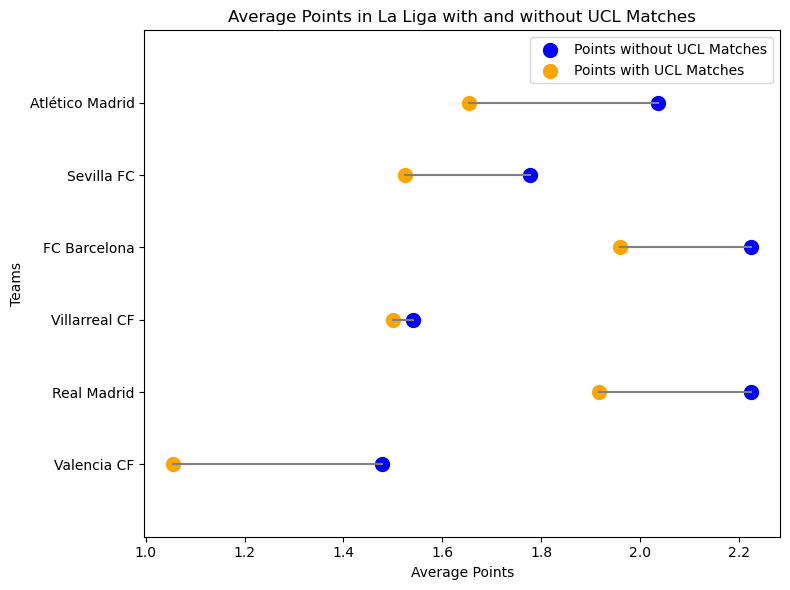

In [36]:
# Set figure size
fig, ax = plt.subplots(figsize=(8, 6))

# Set y-axis limits
ax.set_ylim(-1, len(teams))

# Plot lollipop markers for normal points
ax.scatter(laliga_win_rate, range(len(teams)), color='blue', marker='o', s=100, label='Points without UCL Matches')

# Plot lollipop markers for points with UCL matches
ax.scatter(ucl_win_rate, range(len(teams)), color='orange', marker='o', s=100, label='Points with UCL Matches')

# Plot lines connecting normal and UCL points
for i in range(len(teams)):
    ax.plot([laliga_win_rate[i], ucl_win_rate[i]], [i, i], color='gray')

# Set y-axis tick labels
ax.set_yticks(range(len(teams)))
ax.set_yticklabels(teams)

# Set labels and title
ax.set_xlabel('Average Points')
ax.set_ylabel('Teams')
ax.set_title('Average Points in La Liga with and without UCL Matches')

# Set legend
ax.legend()

# Adjust layout
plt.tight_layout()

# Show the graph
plt.show()

#### Hypothesis testing

- 
**Null Hypothesis (H0)**: There is no significant difference in the performance of teams in weeks with and without UCL matches in La Liga- .
**Alternative Hypothesis (H1)**: There is a significant difference in the performance of teams in weeks with and without UCL matches in La Liga.

$$H_0: \mu_{\text{w\_ucl}} = \mu_{\text{wo\_ucl}} \quad\text{vs}\quad H_1: \mu_{\text{w\_ucl}} \neq \mu_{\text{wo\_ucl}}$$

Which can also be written as:

$$H_0: \mu = 0 \quad\text{vs}\quad H_1: \mu \neq 0$$

Having,

$$\mu = \mu_{\text{liga}} - \mu_{\text{ucl}}$$

It is worth noting that μ represents the difference of both means, goals scored home ($\mu_{\text{liga}}$) and goals scored away ($\mu_{\text{wo\_ucl}}$). Also,
- $\mu_{\text{w\_ucl}}$: Mean of points gained with UCL between national matches.
- $\mu_{\text{wo\_ucl}}$: Mean of points gained without UCL between na*Paired t-test**.

##### **Paired t-test**

In [37]:
# Compute the paired t-test
t_statistic, p_value = ttest_rel(laliga_win_rate, ucl_win_rate)

# Define significance level
alpha = 0.05

# Print the results
print("Paired t-test Results:")
print(f"t-Statistic: {t_statistic}")
print(f"p-Value: {p_value}")

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference in the performance of La Liga teams with and without UCL matches.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in the performance of La Liga teams with and without UCL matches.")


Paired t-test Results:
t-Statistic: 5.0876066988575674
p-Value: 0.003809843031422571
Reject the null hypothesis. There is a statistically significant difference in the performance of La Liga teams with and without UCL matches.


#### Conclusion

Based on the rejection of the null hypothesis, which posed no significant difference in the performance of La Liga teams with and without UEFA Champions League matches, it is concluded that there is indeed a statistically significant impact regarding the participation in the European competition on the performance of national league teams. This suggests that competing in the UCL influences the performance dynamics within the domestic league, potentially affecting factors such as team form, player fitness and physique, and tactical strategies. Such findings underscore the interconnexion of domestic and international football competitions and highlight the importance of considering the broader context when analyzing team performances. Further exploration into the specific mechanisms through which UCL participation influences national league performance could yield valuable insights for teams, coaches, and stakeholders navigating the complexities of modern football competition.

### 3) Real Madrid and comebacks

The research question delves into the phenomenon of Real Madrid's propensity for comebacks in matches, fostering debates about the role of luck versus team attributes such as resilience and strategic prowess. This question holds significance in the football world due to the enduring legacy of Real Madrid as a powerhouse club, coupled with their remarkable ability to overturn deficits and secure victories. The debate surrounding whether these comebacks are a product of chance or deep-rooted in the club's DNA fuels interest among fans, analysts, and rivals alike, shaping perceptions of the team's playing style and competitive spirit.

As the Champions League dataset only contains the final results, it cannot be used for this hypothesis. Thus, the entire La Liga dataset will be the only one used.

In [73]:
# Filter out the first 96 matches of each season
ucl_df_filtered = ucl_df.groupby('SEASON').apply(lambda x: x.iloc[96:])

# Filter out the last match of each season which are the finals
#ucl_df_filtered = ucl_df_filtered.groupby('SEASON').apply(lambda x: x.iloc[:-1])

# Filter the games involving Real Madrid
real_madrid_games = ucl_df_filtered[(ucl_df_filtered['HOME_TEAM'] == 'Real Madrid') | (ucl_df_filtered['AWAY_TEAM'] == 'Real Madrid')]

# Display the result
real_madrid_games

MATCH_ID     SEASON           DATE_TIME            HOME_TEAM  \
SEASON                                                                       
2016-2017 717    mt718  2016-2017 2017-02-15 19:45:00          Real Madrid   
          723    mt724  2016-2017 2017-03-07 19:45:00           SSC Napoli   
          734    mt735  2016-2017 2017-04-12 19:45:00       Bayern München   
          736    mt737  2016-2017 2017-04-18 19:45:00          Real Madrid   
          739    mt740  2016-2017 2017-05-02 19:45:00          Real Madrid   
          742    mt743  2016-2017 2017-05-10 19:45:00      Atlético Madrid   
          743    mt744  2016-2017 2017-06-03 19:45:00             Juventus   
2017-2018 593    mt594  2017-2018 2018-02-14 19:45:00          Real Madrid   
          599    mt600  2017-2018 2018-03-06 19:45:00  Paris Saint-Germain   
          607    mt608  2017-2018 2018-04-03 19:45:00             Juventus   
          613    mt614  2017-2018 2018-04-11 19:45:00          Real Madrid   
          615    mt616  2017-2018 2018-04-25 19:45:00       Bayern München   
          616    mt617  2017-2018 2018-05-01 19:45:00          Real Madrid   
          618    mt619  2017-2018 2018-05-26 19:45:00          Real Madrid   
2018-2019 468    mt469  2018-2019 2019-02-13 20:00:00             AFC Ajax   
          474    mt475  2018-2019 2019-03-05 20:00:00          Real Madrid   
2019-2020 352    mt353  2019-2020 2020-02-26 20:00:00          Real Madrid   
          358    mt359  2019-2020 2020-08-07 20:00:00      Manchester City   
2020-2021 228    mt229  2020-2021 2021-02-24 20:00:00             Atalanta   
          234    mt235  2020-2021 2021-03-16 20:00:00          Real Madrid   
          238    mt239  2020-2021 2021-04-06 20:00:00          Real Madrid   
          244    mt245  2020-2021 2021-04-14 20:00:00         Liverpool FC   
          245    mt246  2020-2021 2021-04-27 20:00:00          Real Madrid   
          248    mt249  2020-2021 2021-05-05 20:00:00           Chelsea FC   
2021-2022 97      mt98  2021-2022 2022-02-15 20:00:00  Paris Saint-Germain   
          107    mt108  2021-2022 2022-03-09 20:00:00          Real Madrid   
          114    mt115  2021-2022 2022-04-06 20:00:00           Chelsea FC   
          116    mt117  2021-2022 2022-04-12 20:00:00          Real Madrid   
          120    mt121  2021-2022 2022-04-26 20:00:00      Manchester City   
          123    mt124  2021-2022 2022-05-04 20:00:00          Real Madrid   
          124    mt125  2021-2022 2022-05-28 20:35:00         Liverpool FC   

                         AWAY_TEAM              STADIUM  FTHG  FTAG  \
SEASON                                                                
2016-2017 717           SSC Napoli    Santiago Bernabéu     3     1   
          723          Real Madrid       Diego Maradona     1     3   
          734          Real Madrid        Allianz Arena     1     2   
          736       Bayern München    Santiago Bernabéu     4     2   
          739      Atlético Madrid    Santiago Bernabéu     3     0   
          742          Real Madrid     Vicente Calderón     2     1   
          743          Real Madrid           Millennium     1     4   
2017-2018 593  Paris Saint-Germain    Santiago Bernabéu     3     1   
          599          Real Madrid     Parc des Princes     1     2   
          607          Real Madrid      Allianz Stadium     0     3   
          613             Juventus    Santiago Bernabéu     1     3   
          615          Real Madrid        Allianz Arena     1     2   
          616       Bayern München    Santiago Bernabéu     2     2   
          618         Liverpool FC          Olimpiyskyi     3     1   
2018-2019 468          Real Madrid  Johan Cruijff ArenA     1     2   
          474             AFC Ajax    Santiago Bernabéu     1     4   
2019-2020 352      Manchester City    Santiago Bernabéu     1     2   
          358          Real Madrid       Etihad Stadium     2     1   
2020-2021 228      

#### EDA

In [38]:
# Count the number of matches Real Madrid played per season
matches_per_team = []
for season, season_data in laliga_df.groupby('Season'):
    home_matches = season_data['HOME_TEAM'].value_counts()
    away_matches = season_data['AWAY_TEAM'].value_counts()
    total_matches = home_matches.add(away_matches, fill_value=0)
    matches_per_team.extend([[season, team, matches] for team, matches in total_matches.items()])

# Create a DataFrame with the results
matches_per_team_df = pd.DataFrame(matches_per_team, columns=['Season', 'Team', 'Matches'])

# Sort the DataFrame by season and then by team name
matches_per_team_df.sort_values(by=['Season', 'Team'], inplace=True)

# Reset index after sorting
matches_per_team_df.reset_index(drop=True, inplace=True)

# Print the DataFrame
matches_RM = matches_per_team_df[matches_per_team_df['Team'] == 'Real Madrid']

In [39]:
matches_RM

,Season,Team,Matches
11,1995-96,Real Madrid,42
34,1996-97,Real Madrid,42
55,1997-98,Real Madrid,38
75,1998-99,Real Madrid,38
96,1999-2000,Real Madrid,38
116,2000-01,Real Madrid,38
135,2001-02,Real Madrid,38
155,2002-03,Real Madrid,38
176,2003-04,Real Madrid,38
197,2004-05,Real Madrid,38


##### Real Madrid's all time results (1995-96 to 2023-24)

In [40]:
# Calculate all the years that Real Madrid played in La Liga dataset
years = laliga_df['DATE_TIME'].dt.year.unique()

# Calculate result rates from Real Madrid over all those years
results_RM = u.calculator(laliga_df, 'Real Madrid', years, results=True)

In [41]:
# Print the results
print('---REAL MADRID MATCH RESULTS FROM SEASON 1995-96 TO 2023-24---')
print("Real Madrid Home Wins:", results_RM[0])
print("Real Madrid Away Wins:", results_RM[1])
print("Real Madrid Home Draws:", results_RM[2])
print("Real Madrid Away Draws:", results_RM[3])
print("Real Madrid Home Losses:", results_RM[4])
print("Real Madrid Away Losses:", results_RM[5])

---REAL MADRID MATCH RESULTS FROM SEASON 1995-96 TO 2023-24---
Real Madrid Home Wins: 399
Real Madrid Away Wins: 291
Real Madrid Home Draws: 78
Real Madrid Away Draws: 125
Real Madrid Home Losses: 62
Real Madrid Away Losses: 125


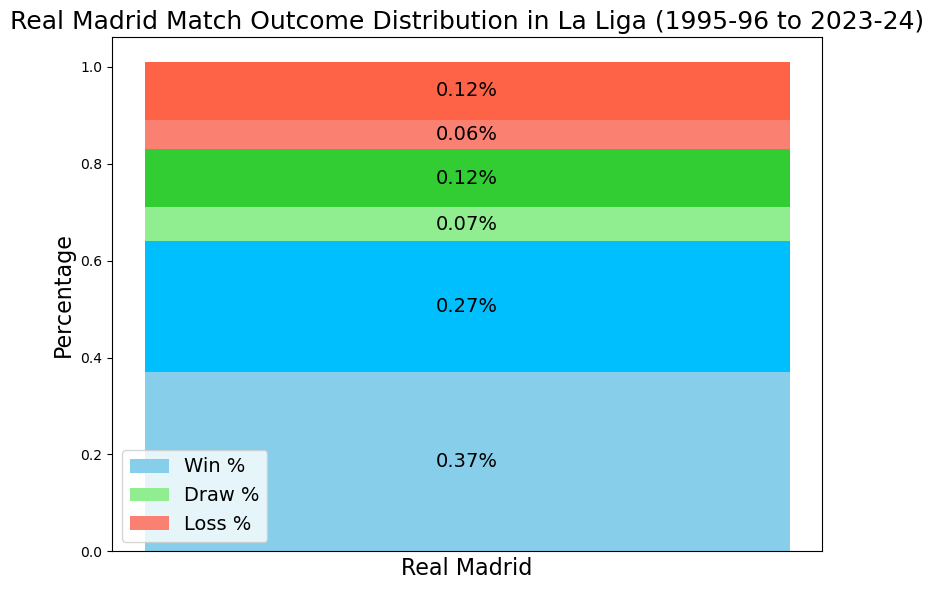

In [42]:
rates_RM = np.round(np.array(results_RM)/np.array(results_RM).sum(), 2)

# Plot the Real Madrid's match outcome rates
plt.figure(figsize=(8, 6))
bar_width = 0.2
index = np.arange(1)

# Plot Real Madrid's rates
plt.bar(index, rates_RM[0], color='skyblue', label='Win %', width=bar_width)
plt.bar(index, rates_RM[1], color='deepskyblue', width=bar_width, bottom=rates_RM[0])
plt.bar(index, rates_RM[2], color='lightgreen', label='Draw %', width=bar_width, bottom=rates_RM[0]+rates_RM[1])
plt.bar(index, rates_RM[3], color='limegreen', width=bar_width, bottom=rates_RM[0]+rates_RM[1]+rates_RM[2])
plt.bar(index, rates_RM[4], color='salmon', label='Loss %', width=bar_width, bottom=rates_RM[0]+rates_RM[1]+rates_RM[2]+rates_RM[3])
plt.bar(index, rates_RM[5], color='tomato', width=bar_width, bottom=rates_RM[0]+rates_RM[1]+rates_RM[2]+rates_RM[3]+rates_RM[4])


# Add percentage labels on top of each bar
for i, rate in enumerate(rates_RM):
    plt.text(index, sum(rates_RM[:i+1]) - rate/2, f'{rate:.2f}%', ha='center', va='center', color='black', fontsize=14)

# Adjust x-axis ticks and labels
plt.xlabel('Real Madrid', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.title('Real Madrid Match Outcome Distribution in La Liga (1995-96 to 2023-24)', fontsize=18)
plt.xticks([], [])
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

##### Real Madrid's results by seasons (1995-96 to 2023-24)

In [43]:
# List to store results per team and year
RM_results_season = []

for year in years:
    # Count results for Real Madrid
    results_RM = u.calculator(laliga_df, 'Real Madrid', int(year), results=True)
    
    # Append the year to the results
    results_RM.append(year)

    # Append the results to the list
    RM_results_season.append(results_RM)

# Create a DataFrame with the results
RM_results_df = pd.DataFrame(RM_results_season, columns=['Home Wins', 'Away Wins', 'Home Draws', 'Away Draws', 'Home Losses', 'Away Losses', 'Season'])

# Sort the DataFrame by season and then by team name
RM_results_df.sort_values(by=['Season'], inplace=True)

# Reset index after sorting
RM_results_df.reset_index(drop=True, inplace=True)

In [44]:
# Calculate total matches per season
RM_results_df['Total Matches'] = RM_results_df['Home Wins'] + RM_results_df['Away Wins'] + RM_results_df['Home Draws'] + RM_results_df['Away Draws'] + RM_results_df['Home Losses'] + RM_results_df['Away Losses']

# Calculate percentage of each result
RM_results_df['Home Win %'] = (RM_results_df['Home Wins'] / RM_results_df['Total Matches']) * 100
RM_results_df['Away Win %'] = (RM_results_df['Away Wins'] / RM_results_df['Total Matches']) * 100
RM_results_df['Home Draw %'] = (RM_results_df['Home Draws'] / RM_results_df['Total Matches']) * 100
RM_results_df['Away Draw %'] = (RM_results_df['Away Draws'] / RM_results_df['Total Matches']) * 100
RM_results_df['Home Loss %'] = (RM_results_df['Home Losses'] / RM_results_df['Total Matches']) * 100
RM_results_df['Away Loss %'] = (RM_results_df['Away Losses'] / RM_results_df['Total Matches']) * 100

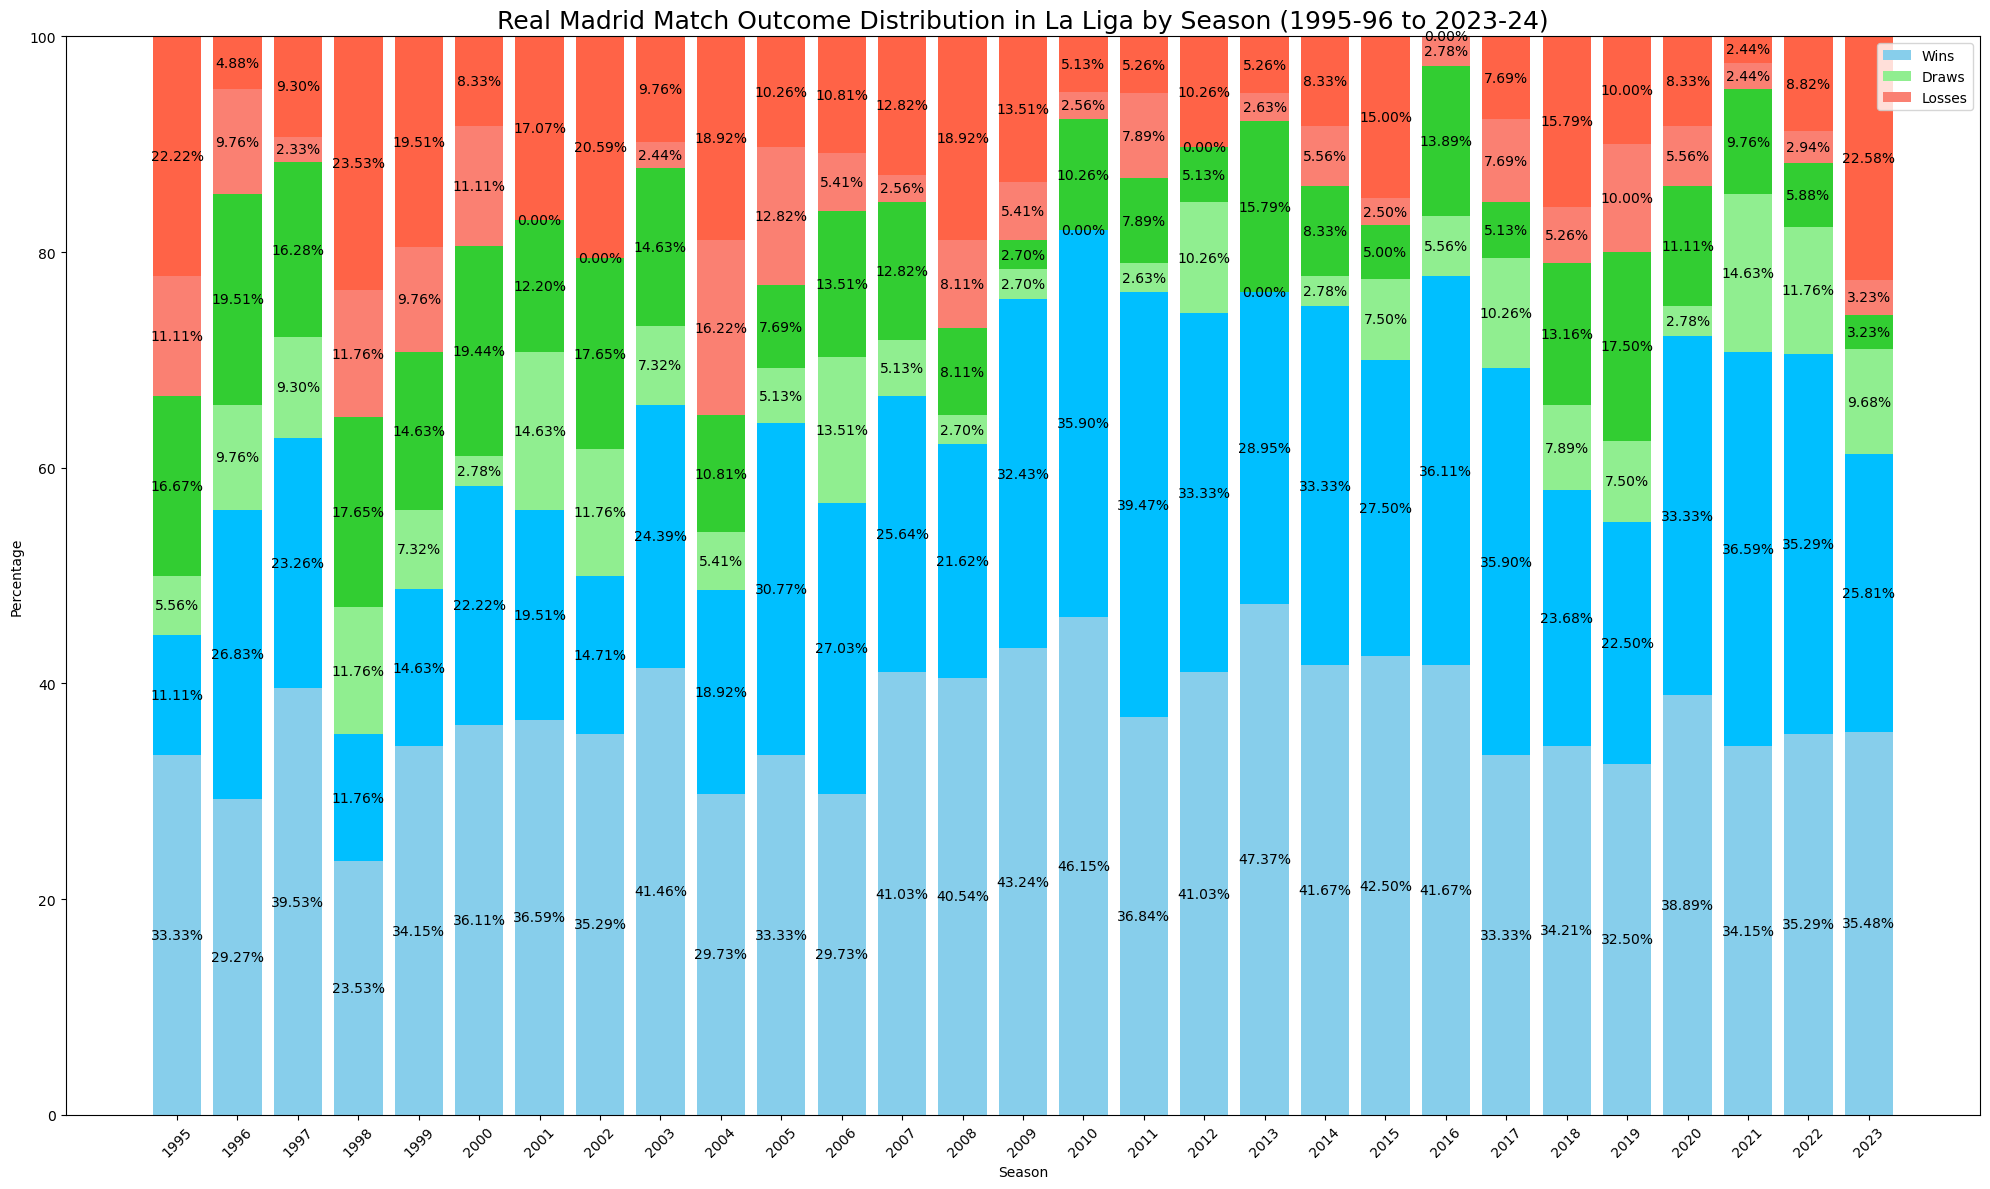

In [45]:
# Plot the results
plt.figure(figsize=(20, 12))
bar_width = 0.35
index = RM_results_df.index

plt.bar(index, RM_results_df['Home Win %'], color='skyblue', label='Wins')
plt.bar(index, RM_results_df['Away Win %'], color='deepskyblue', bottom=RM_results_df['Home Win %'])
plt.bar(index, RM_results_df['Home Draw %'], color='lightgreen', label='Draws', bottom=RM_results_df['Home Win %'] + RM_results_df['Away Win %'])
plt.bar(index, RM_results_df['Away Draw %'], color='limegreen', bottom=RM_results_df['Home Win %'] + RM_results_df['Away Win %'] + RM_results_df['Home Draw %'])
plt.bar(index, RM_results_df['Home Loss %'], color='salmon', label='Losses', bottom=RM_results_df['Home Win %'] + RM_results_df['Away Win %'] + RM_results_df['Home Draw %'] + RM_results_df['Away Draw %'])
plt.bar(index, RM_results_df['Away Loss %'], color='tomato', bottom=RM_results_df['Home Win %'] + RM_results_df['Away Win %'] + RM_results_df['Home Draw %'] + RM_results_df['Away Draw %'] + RM_results_df['Home Loss %'])

# Add percentage labels on top of each bar
for i, row in RM_results_df.iterrows():
    plt.text(i, row['Home Win %'] / 2, f'{row["Home Win %"]:.2f}%', ha='center', va='center', color='black', fontsize=10)
    plt.text(i, row['Home Win %'] + row['Away Win %'] / 2, f'{row["Away Win %"]:.2f}%', ha='center', va='center', color='black', fontsize=10)
    plt.text(i, row['Home Win %'] + row['Away Win %'] + row['Home Draw %'] / 2, f'{row["Home Draw %"]:.2f}%', ha='center', va='center', color='black', fontsize=10)
    plt.text(i, row['Home Win %'] + row['Away Win %'] + row['Home Draw %'] + row['Away Draw %'] / 2, f'{row["Away Draw %"]:.2f}%', ha='center', va='center', color='black', fontsize=10)
    plt.text(i, row['Home Win %'] + row['Away Win %'] + row['Home Draw %'] + row['Away Draw %'] + row['Home Loss %'] / 2, f'{row["Home Loss %"]:.2f}%', ha='center', va='center', color='black', fontsize=10)
    plt.text(i, row['Home Win %'] + row['Away Win %'] + row['Home Draw %'] + row['Away Draw %'] + row['Home Loss %'] + row['Away Loss %'] / 2, f'{row["Away Loss %"]:.2f}%', ha='center', va='center', color='black', fontsize=10)

# Adjust x-axis ticks and labels
plt.xlabel('Season')
plt.ylabel('Percentage')
plt.title('Real Madrid Match Outcome Distribution in La Liga by Season (1995-96 to 2023-24)', fontsize=18)
plt.legend()
plt.xticks(index, RM_results_df['Season'], rotation=45)
plt.tight_layout()
plt.show()

##### Real Madrid's comebacks by seasons (1995-96 to 2023-24)

Here a count of matches that Real Madrid was loosing at half time but ended winning is shown.

In [46]:
# Lista para almacenar las remontadas por temporada del Real Madrid
comeback_results = []

# Iterar sobre cada temporada
for season, season_data in laliga_df.groupby('Season'):
    # Filtrar los datos de la temporada para los partidos del Real Madrid
    real_madrid_data = season_data[(season_data['HOME_TEAM'] == 'Real Madrid') | (season_data['AWAY_TEAM'] == 'Real Madrid')]
    # Identificar las remontadas del Real Madrid en esta temporada
    comebacks = real_madrid_data[(real_madrid_data['HTR'] == 'A') & (real_madrid_data['FTR'] == 'H')]
    # Contar el número de remontadas
    num_comebacks = len(comebacks)
    # Agregar el resultado a la lista
    comeback_results.append([season, num_comebacks])

# Crear un DataFrame con los resultados
comeback_results_df = pd.DataFrame(comeback_results, columns=['Season', 'Comebacks'])

# Imprimir el DataFrame
comeback_results_df

,Season,Comebacks
0,1995-96,0
1,1996-97,2
2,1997-98,0
3,1998-99,1
4,1999-2000,1
5,2000-01,0
6,2001-02,0
7,2002-03,2
8,2003-04,1
9,2004-05,1


#### Obtaining data of interest

First of all, a dataframe containing different outcomes comparing half and full time is created.

In [47]:
# List to store results per season of Real Madrid
real_madrid_results = []

# Iterate over each season
for season, season_data in laliga_df.groupby('Season'):
    # Filter the data for Real Madrid's matches in the season
    real_madrid_data = season_data[(season_data['HOME_TEAM'] == 'Real Madrid') | (season_data['AWAY_TEAM'] == 'Real Madrid')]
    
    # Identify different match scenarios for Real Madrid
    real_madrid_data.loc[:, 'HT_2_FT'] = real_madrid_data.apply(
        lambda x: (
            'Lose_to_Win' if ((x['HOME_TEAM'] == 'Real Madrid' and x['HTR'] == 'A' and x['FTR'] == 'H') or (x['AWAY_TEAM'] == 'Real Madrid' and x['HTR'] == 'H' and x['FTR'] == 'A')) else
            'Draw_to_Win' if ((x['HOME_TEAM'] == 'Real Madrid' and x['HTR'] == 'D' and x['FTR'] == 'H') or (x['AWAY_TEAM'] == 'Real Madrid' and x['HTR'] == 'D' and x['FTR'] == 'A')) else 
            'Win_to_Win' if ((x['HOME_TEAM'] == 'Real Madrid' and x['HTR'] == 'H' and x['FTR'] == 'H') or (x['AWAY_TEAM'] == 'Real Madrid' and x['HTR'] == 'A' and x['FTR'] == 'A')) else
            'Lose_to_Draw' if ((x['HOME_TEAM'] == 'Real Madrid' and x['HTR'] == 'A' and x['FTR'] == 'D') or (x['AWAY_TEAM'] == 'Real Madrid' and x['HTR'] == 'H' and x['FTR'] == 'D')) else
            'Draw_to_Draw' if ((x['HOME_TEAM'] == 'Real Madrid' and x['HTR'] == 'D' and x['FTR'] == 'D') or (x['AWAY_TEAM'] == 'Real Madrid' and x['HTR'] == 'D' and x['FTR'] == 'D')) else
            'Win_to_Draw' if ((x['HOME_TEAM'] == 'Real Madrid' and x['HTR'] == 'H' and x['FTR'] == 'D') or (x['AWAY_TEAM'] == 'Real Madrid' and x['HTR'] == 'A' and x['FTR'] == 'D')) else
            'Lose_to_Lose' if ((x['HOME_TEAM'] == 'Real Madrid' and x['HTR'] == 'A' and x['FTR'] == 'A') or (x['AWAY_TEAM'] == 'Real Madrid' and x['HTR'] == 'H' and x['FTR'] == 'H')) else
            'Draw_to_Lose' if ((x['HOME_TEAM'] == 'Real Madrid' and x['HTR'] == 'D' and x['FTR'] == 'A') or (x['AWAY_TEAM'] == 'Real Madrid' and x['HTR'] == 'D' and x['FTR'] == 'H')) else
            'Win_to_Lose' if ((x['HOME_TEAM'] == 'Real Madrid' and x['HTR'] == 'H' and x['FTR'] == 'A') or (x['AWAY_TEAM'] == 'Real Madrid' and x['HTR'] == 'A' and x['FTR'] == 'H')) else ''),
        axis=1)

    
    # Count the number of occurrences of each scenario
    scenario_counts = real_madrid_data['HT_2_FT'].value_counts()
    
    # Append the results to the list
    real_madrid_results.append([season, 
                                scenario_counts.get('Lose_to_Win', 0),
                                scenario_counts.get('Lose_to_Draw', 0),
                                scenario_counts.get('Lose_to_Lose', 0),
                                scenario_counts.get('Draw_to_Win', 0),
                                scenario_counts.get('Draw_to_Draw', 0),
                                scenario_counts.get('Draw_to_Lose', 0),
                                scenario_counts.get('Win_to_Win', 0),
                                scenario_counts.get('Win_to_Draw', 0),
                                scenario_counts.get('Win_to_Lose', 0)])

# Create a DataFrame with the results
real_madrid_results_df = pd.DataFrame(real_madrid_results, 
                                       columns=['Season', 'Lose_to_Win', 'Lose_to_Draw', 'Lose_to_Lose', 'Draw_to_Win', 'Draw_to_Draw', 'Draw_to_Lose', 'Win_to_Win', 'Win_to_Draw', 'Win_to_Lose'])

# Set the colors for each scenario
colors = {
    'Lose_to_Win': 'skyblue',
    'Lose_to_Draw': 'lightblue', 
    'Lose_to_Lose': 'deepskyblue',
    'Draw_to_Win': 'lightgreen',
    'Draw_to_Draw': 'limegreen',
    'Draw_to_Lose': 'forestgreen', 
    'Win_to_Win': 'salmon',
    'Win_to_Draw': 'lightsalmon', 
    'Win_to_Lose': 'tomato'
}

In [48]:
# Display teh datafram of Real Madrid match outcomes comparing half and full time
real_madrid_results_df

,Season,Lose_to_Win,Lose_to_Draw,Lose_to_Lose,Draw_to_Win,Draw_to_Draw,Draw_to_Lose,Win_to_Win,Win_to_Draw,Win_to_Lose
0,1995-96,0,1,7,5,7,5,15,2,0
1,1996-97,3,1,2,6,9,2,18,1,0
2,1997-98,0,3,5,6,7,4,11,2,0
3,1998-99,2,1,8,5,3,4,14,1,0
4,1999-2000,2,3,7,10,6,1,4,5,0
5,2000-01,0,1,4,8,4,2,16,3,0
6,2001-02,1,1,5,5,4,5,13,4,0
7,2002-03,3,3,3,6,7,0,13,2,1
8,2003-04,2,2,8,6,5,2,13,0,0
9,2004-05,2,1,7,9,4,1,14,0,0


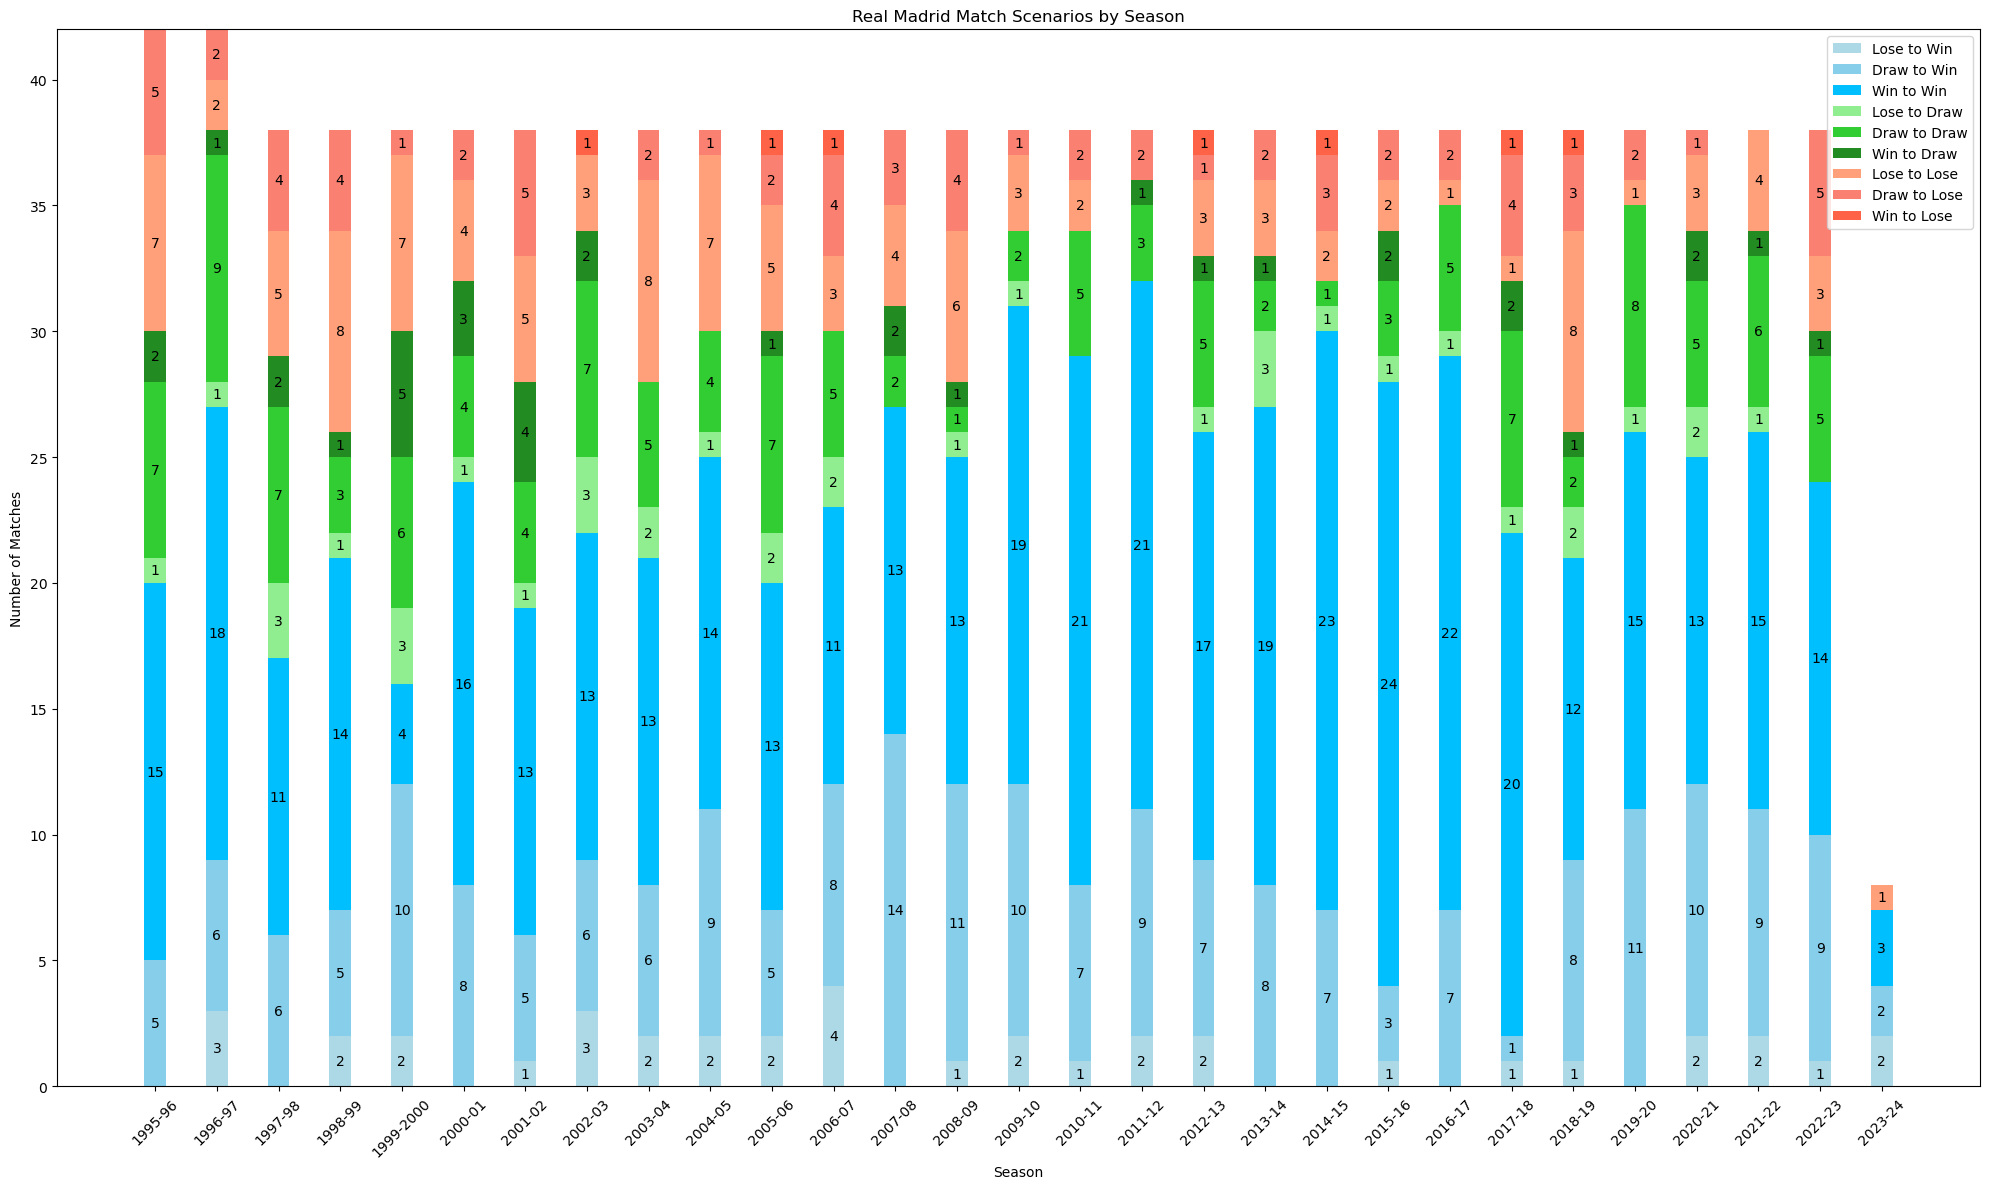

In [49]:
# Plot the results
plt.figure(figsize=(20, 12))
bar_width = 0.35
index = real_madrid_results_df.index

plt.bar(index, real_madrid_results_df['Lose_to_Win'], color='lightblue', label='Lose to Win', width=bar_width)
plt.bar(index, real_madrid_results_df['Draw_to_Win'], color='skyblue', label='Draw to Win', width=bar_width, bottom=real_madrid_results_df['Lose_to_Win'])
plt.bar(index, real_madrid_results_df['Win_to_Win'], color='deepskyblue', label='Win to Win', width=bar_width, bottom=real_madrid_results_df['Lose_to_Win'] + real_madrid_results_df['Draw_to_Win'])

plt.bar(index, real_madrid_results_df['Lose_to_Draw'], color='lightgreen', label='Lose to Draw', width=bar_width, bottom=real_madrid_results_df['Lose_to_Win'] + real_madrid_results_df['Draw_to_Win'] + real_madrid_results_df['Win_to_Win'])
plt.bar(index, real_madrid_results_df['Draw_to_Draw'], color='limegreen', label='Draw to Draw', width=bar_width, bottom=real_madrid_results_df['Lose_to_Win'] + real_madrid_results_df['Draw_to_Win'] + real_madrid_results_df['Win_to_Win'] + real_madrid_results_df['Lose_to_Draw'])
plt.bar(index, real_madrid_results_df['Win_to_Draw'], color='forestgreen', label='Win to Draw', width=bar_width, bottom=real_madrid_results_df['Lose_to_Win'] + real_madrid_results_df['Draw_to_Win'] + real_madrid_results_df['Win_to_Win'] + real_madrid_results_df['Lose_to_Draw'] + real_madrid_results_df['Draw_to_Draw'])

plt.bar(index, real_madrid_results_df['Lose_to_Lose'], color='lightsalmon', label='Lose to Lose', width=bar_width, bottom=real_madrid_results_df['Lose_to_Win'] + real_madrid_results_df['Draw_to_Win'] + real_madrid_results_df['Win_to_Win'] + real_madrid_results_df['Lose_to_Draw'] + real_madrid_results_df['Draw_to_Draw'] + real_madrid_results_df['Win_to_Draw'])
plt.bar(index, real_madrid_results_df['Draw_to_Lose'], color='salmon', label='Draw to Lose', width=bar_width, bottom=real_madrid_results_df['Lose_to_Win'] + real_madrid_results_df['Draw_to_Win'] + real_madrid_results_df['Win_to_Win'] + real_madrid_results_df['Lose_to_Draw'] + real_madrid_results_df['Draw_to_Draw'] + real_madrid_results_df['Win_to_Draw'] + real_madrid_results_df['Lose_to_Lose'])
plt.bar(index, real_madrid_results_df['Win_to_Lose'], color='tomato', label='Win to Lose', width=bar_width, bottom=real_madrid_results_df['Lose_to_Win'] + real_madrid_results_df['Draw_to_Win'] + real_madrid_results_df['Win_to_Win'] + real_madrid_results_df['Lose_to_Draw'] + real_madrid_results_df['Draw_to_Draw'] + real_madrid_results_df['Win_to_Draw'] + real_madrid_results_df['Lose_to_Lose'] + real_madrid_results_df['Draw_to_Lose'])

# Add labels on top of each bar
for i, row in real_madrid_results_df.iterrows():
    if row['Lose_to_Win'] != 0:
        plt.text(i, real_madrid_results_df['Lose_to_Win'][i] / 2, f'{real_madrid_results_df["Lose_to_Win"][i]}', ha='center', va='center', color='black', fontsize=10)
    if row['Draw_to_Win'] != 0:
        plt.text(i, real_madrid_results_df['Lose_to_Win'][i] + real_madrid_results_df['Draw_to_Win'][i] / 2, f'{real_madrid_results_df["Draw_to_Win"][i]}', ha='center', va='center', color='black', fontsize=10)
    if row['Win_to_Win'] != 0:
        plt.text(i, real_madrid_results_df['Lose_to_Win'][i] + real_madrid_results_df['Draw_to_Win'][i] + real_madrid_results_df['Win_to_Win'][i] / 2, f'{real_madrid_results_df["Win_to_Win"][i]}', ha='center', va='center', color='black', fontsize=10)
    if row['Lose_to_Draw'] != 0:
        plt.text(i, real_madrid_results_df['Lose_to_Win'][i] + real_madrid_results_df['Draw_to_Win'][i] + real_madrid_results_df['Win_to_Win'][i] + real_madrid_results_df['Lose_to_Draw'][i] / 2, f'{real_madrid_results_df["Lose_to_Draw"][i]}', ha='center', va='center', color='black', fontsize=10)
    if row['Draw_to_Draw'] != 0:
        plt.text(i, real_madrid_results_df['Lose_to_Win'][i] + real_madrid_results_df['Draw_to_Win'][i] + real_madrid_results_df['Win_to_Win'][i] + real_madrid_results_df['Lose_to_Draw'][i] + real_madrid_results_df['Draw_to_Draw'][i] / 2, f'{real_madrid_results_df["Draw_to_Draw"][i]}', ha='center', va='center', color='black', fontsize=10)
    if row['Win_to_Draw'] != 0:
        plt.text(i, real_madrid_results_df['Lose_to_Win'][i] + real_madrid_results_df['Draw_to_Win'][i] + real_madrid_results_df['Win_to_Win'][i] + real_madrid_results_df['Lose_to_Draw'][i] + real_madrid_results_df['Draw_to_Draw'][i] + real_madrid_results_df['Win_to_Draw'][i] / 2, f'{real_madrid_results_df["Win_to_Draw"][i]}', ha='center', va='center', color='black', fontsize=10)
    if row['Lose_to_Lose'] != 0:
        plt.text(i, real_madrid_results_df['Lose_to_Win'][i] + real_madrid_results_df['Draw_to_Win'][i] + real_madrid_results_df['Win_to_Win'][i] + real_madrid_results_df['Lose_to_Draw'][i] + real_madrid_results_df['Draw_to_Draw'][i] + real_madrid_results_df['Win_to_Draw'][i] + real_madrid_results_df['Lose_to_Lose'][i] / 2, f'{real_madrid_results_df["Lose_to_Lose"][i]}', ha='center', va='center', color='black', fontsize=10)
    if row['Draw_to_Lose'] != 0:
        plt.text(i, real_madrid_results_df['Lose_to_Win'][i] + real_madrid_results_df['Draw_to_Win'][i] + real_madrid_results_df['Win_to_Win'][i] + real_madrid_results_df['Lose_to_Draw'][i] + real_madrid_results_df['Draw_to_Draw'][i] + real_madrid_results_df['Win_to_Draw'][i] + real_madrid_results_df['Lose_to_Lose'][i] + real_madrid_results_df['Draw_to_Lose'][i] / 2, f'{real_madrid_results_df["Draw_to_Lose"][i]}', ha='center', va='center', color='black', fontsize=10)
    if row['Win_to_Lose'] != 0:
        plt.text(i, real_madrid_results_df['Lose_to_Win'][i] + real_madrid_results_df['Draw_to_Win'][i] + real_madrid_results_df['Win_to_Win'][i] + real_madrid_results_df['Lose_to_Draw'][i] + real_madrid_results_df['Draw_to_Draw'][i] + real_madrid_results_df['Win_to_Draw'][i] + real_madrid_results_df['Lose_to_Lose'][i] + real_madrid_results_df['Draw_to_Lose'][i] + real_madrid_results_df['Win_to_Lose'][i] / 2, f'{real_madrid_results_df["Win_to_Lose"][i]}', ha='center', va='center', color='black', fontsize=10)

# Adjust x-axis ticks and labels
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.title('Real Madrid Match Scenarios by Season')
plt.legend()
plt.xticks(index, real_madrid_results_df['Season'], rotation=45)
plt.tight_layout()
plt.show()


Now, two columns are obtained from:
- **Comebacks**: the sum of results starting (at half time) with a lose and ending (at full time) with a win or draw and those starting with a draw and ending in a win.
- **Failures**: the sum of restls starting with a lose and ending with the same.

In [50]:
# Create the DataFrame comebacks_RM
comebacks_RM = pd.DataFrame()

# Calculate the 'comebacks' column
comebacks_RM['comebacks'] = real_madrid_results_df['Lose_to_Win'] + real_madrid_results_df['Lose_to_Draw'] + real_madrid_results_df['Draw_to_Win']

# Calculate the 'failures' column
comebacks_RM['failures'] = real_madrid_results_df['Lose_to_Lose']

# Show the comebacks_RM DataFrame
comebacks_RM

,comebacks,failures
0,6,7
1,10,2
2,9,5
3,8,8
4,15,7
5,9,4
6,7,5
7,12,3
8,10,8
9,12,7


#### Visual Normality Test

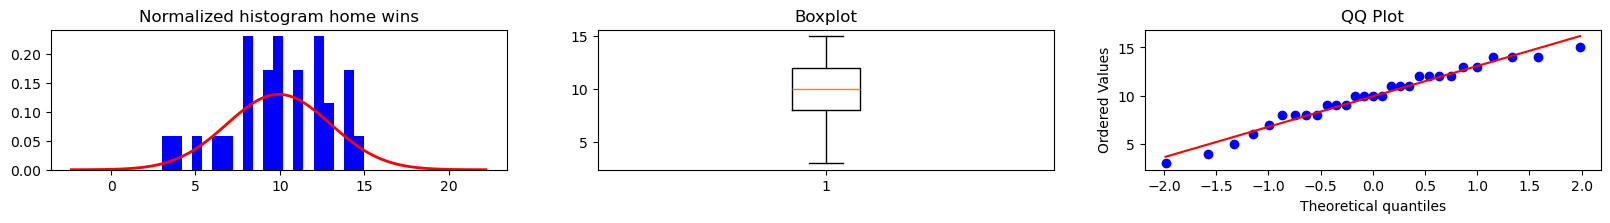

Shapiro-Wilk Statistic (Normal Win Rates): 0.9666845798492432
p-value (Normal Win Rates): 0.4736495018005371
The data follows a normal distribution.


In [51]:
# For comebacks
comebacks = np.array(comebacks_RM['comebacks'])

u.visual_normality_test(comebacks, 'blue')

# Shapiro-Wilk test
sw_statistic, p_value = shapiro(comebacks)

print('Shapiro-Wilk Statistic (Normal Win Rates):', sw_statistic)
print('p-value (Normal Win Rates):', p_value)
if p_value > 0.05:
    print('The data follows a normal distribution.')
else:
    print('The data does not follow a normal distribution.')

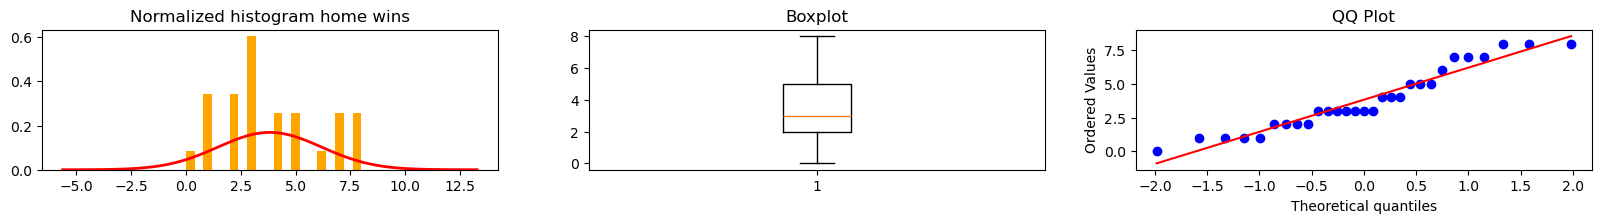

Shapiro-Wilk Statistic (Normal Win Rates): 0.9260507225990295
p-value (Normal Win Rates): 0.04350944235920906
The data does not follow a normal distribution.


In [52]:
# For comebacks
failures = np.array(comebacks_RM['failures'])

u.visual_normality_test(failures, 'orange')

# Shapiro-Wilk test
sw_statistic, p_value = shapiro(failures)

print('Shapiro-Wilk Statistic (Normal Win Rates):', sw_statistic)
print('p-value (Normal Win Rates):', p_value)
if p_value > 0.05:
    print('The data follows a normal distribution.')
else:
    print('The data does not follow a normal distribution.')

#### Hypothesis testing

Now the hypothesis testing is stated, having:

- **Null Hypothesis (H0)**: There is no significant difference in the proportion of comebacks and failures for Real Madrid.
- **Alternative Hypothesis (H1)**: There is a significant difference in the proportion of comebacks and failures for Real Madrid.

$$H_0: p_{\text{comebacks}} = p_{\text{failures}} \quad\text{vs}\quad H_1: p_{\text{comebacks}} \neq p_{\text{failures}}$$

Which can also be written as:

$$H_0: p = 0 \quad\text{vs}\quad H_1: p \neq 0$$

Having,

$$p = p_{\text{comebacks}} - p_{\text{failures}}$$

It is worth noting that \(p\) represents the difference in proportions of comebacks ($p_{\text{comebacks}}$) and failures ($p_{\text{failures}}$) for Real Madrid.
- $p_{\text{comebacks}}$: Proportion for Real Madrid comebacks.
- $p_{\text{failures}}$: Proportion for Real Madrid failures.


**Test for Proportions**

- One Sample Test

In [53]:
# Calculate the total number of observations
total_obs = np.array(matches_RM['Matches']).sum()

# Calculate the total number of successes
total_successes = sum(comebacks)

# Calculate the total number of failures
total_failures = sum(failures)

# Perform z-test for proportions
z_score, p_value = proportions_ztest(total_successes, total_obs, value=0.05, alternative='two-sided')

print(f"z-score: {z_score}")
print(f"p-value: {p_value}")

z-score: 16.101595064973022
p-value: 2.4861200348285443e-58


- Two Sample Test

In [54]:
# Calculate the total number of observations
total_obs = np.array(matches_RM['Matches']).sum()

# Calculate the total number of successes
total_successes = sum(comebacks)

# Calculate the total number of failures
total_failures = sum(failures)

# Perform z-test for proportions
z_score, p_value = proportions_ztest([total_successes, total_failures], [total_obs, total_obs], alternative='two-sided')

print(f"z-score: {z_score}")
print(f"p-value: {p_value}")

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference between the proportion of comebacks and failures.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant between the proportion of comebacks and failures.")

z-score: 9.813727984736973
p-value: 9.826949181660204e-23
Reject the null hypothesis. There is a statistically significant difference between the proportion of comebacks and failures.


#### Conclusion

Based on the result, it can be concluded that there is substantial evidence to suggest that Real Madrid's performance in terms of comebacks is significantly different from its performance in terms of failures. This implies that Real Madrid's ability to recover from a losing position or turn a drawn match into a win is statistically distinct from its performance when it fails to do so. Therefore, Real Madrid's tendency to stage comebacks is a notable aspect of its performance suggests that Real Madrid's comebacks are likely attributable to more than mere luck, such as the team's winning DNA.

This debate needs further analysis and consideration in understanding the team's dynamics and strategies, as the data provided only stated the half and full time results, only being able to analyze a sample of all the comebacks that Real Madrid has performed. Also, it would be curious to extend this study with a Champions League dataset, as the gratness of this team in the European competitions is well known.

## Discussion



# EXTRAS:


Visualization:


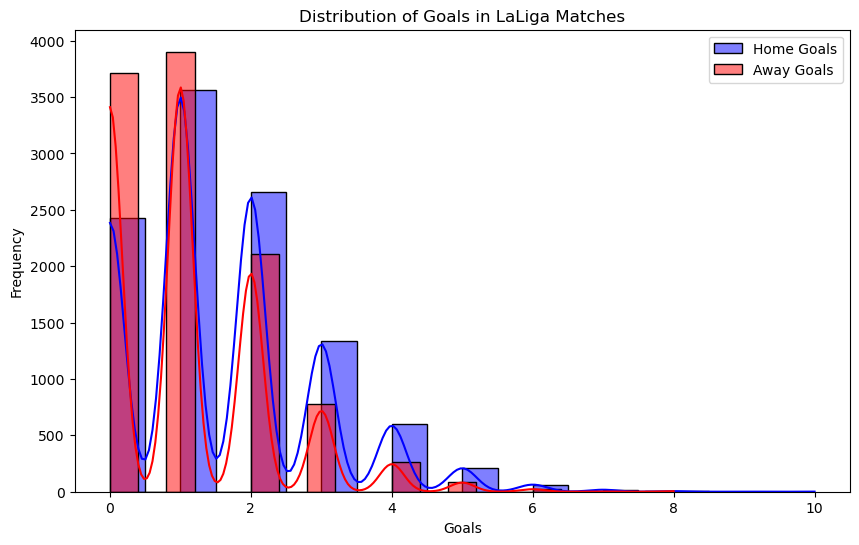

In [17]:
print("\nVisualization:")
# Example: Histogram for FTHG and FTAG
plt.figure(figsize=(10, 6))
sns.histplot(data=laliga_df, x='FTHG', bins=20, kde=True, color='blue', label='Home Goals')
sns.histplot(data=laliga_df, x='FTAG', bins=20, kde=True, color='red', label='Away Goals')
plt.title('Distribution of Goals in LaLiga Matches')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Visualization:


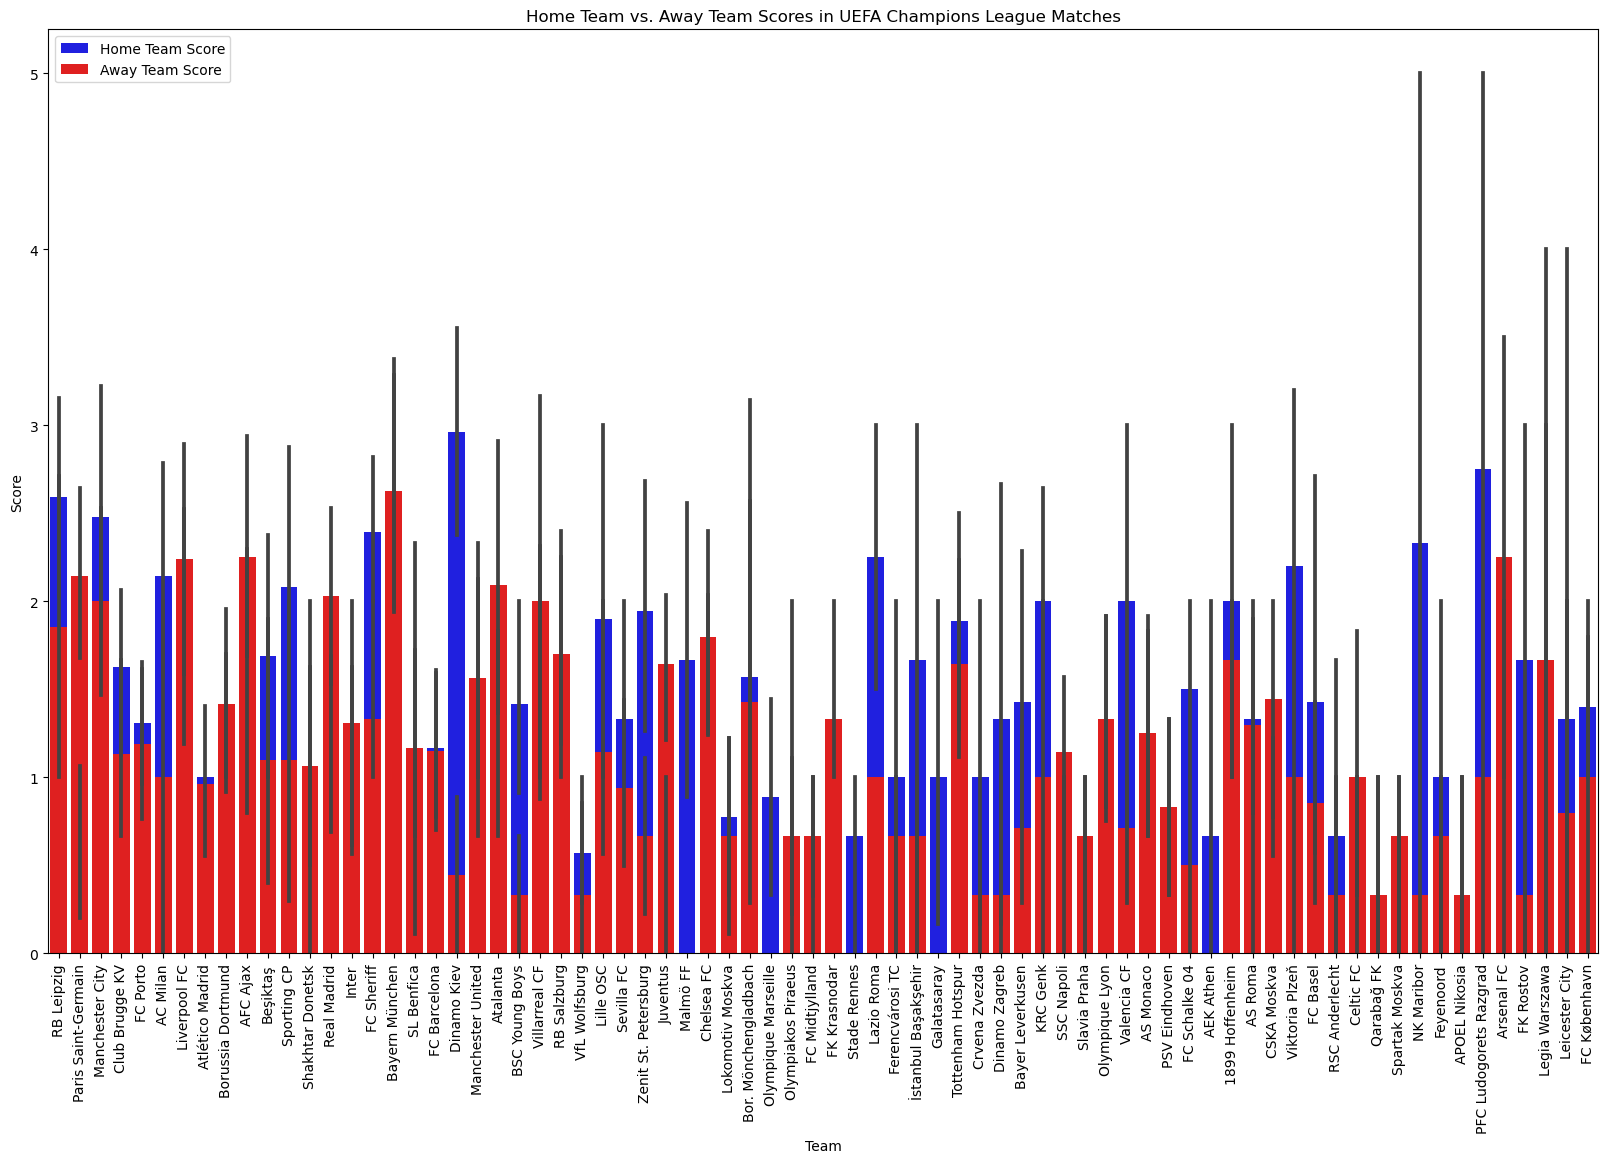

In [27]:
print("\nVisualization:")
# Example: Bar plot for Home Team vs. Away Team scores
plt.figure(figsize=(20, 12))
sns.barplot(data=ucl_df, x='HOME_TEAM', y='FTHG', color='blue', label='Home Team Score')
sns.barplot(data=ucl_df, x='AWAY_TEAM', y='FTAG', color='red', label='Away Team Score')
plt.title('Home Team vs. Away Team Scores in UEFA Champions League Matches')
plt.xlabel('Team')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [52]:
# Count the number of home wins, away wins, and draws per season
results = []
for season, season_data in laliga_df.groupby('Season'):
    home_wins = (season_data['FTR'] == 'H').sum()
    away_wins = (season_data['FTR'] == 'A').sum()
    draws = (season_data['FTR'] == 'D').sum()
    results.append([season, home_wins, away_wins, draws])

# Create a DataFrame with the results
results_df = pd.DataFrame(results, columns=['Season', 'Home Wins', 'Away Wins', 'Draws'])

# Print the DataFrame
results_df

,Season,Home Wins,Away Wins,Draws
0,1995-96,211,121,130
1,1996-97,220,123,119
2,1997-98,182,88,110
3,1998-99,191,92,97
4,1999-2000,182,86,112
5,2000-01,199,82,99
6,2001-02,186,93,101
7,2002-03,176,99,105
8,2003-04,172,113,95
9,2004-05,192,88,100


In [191]:
df = laliga_df
team_matches = df[(df['HOME_TEAM'] == team) | (df['AWAY_TEAM'] == team)]
team_year_matches = team_matches[team_matches['DATE_TIME'].dt.year == 2022]
t = team_matches[team_matches['Season'] == '2021-22']

In [46]:
# Filtrar la data para quedarse solo con la temporada 2021-2022 y las filas donde aparece el Real Madrid
filtered_data = laliga_df[(laliga_df['Season'] == '2021-22') & ((laliga_df['HOME_TEAM'] == 'Real Madrid') | (laliga_df['AWAY_TEAM'] == 'Real Madrid'))]

# Imprimir el resultado
filtered_data

,Season,DATE_TIME,HOME_TEAM,AWAY_TEAM,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Start_Year
10047,2021-22,2021-08-14,Alaves,Real Madrid,1,4,A,0,0,D,2021
10061,2021-22,2021-08-22,Levante,Real Madrid,3,3,D,0,1,A,2021
10069,2021-22,2021-08-28,Betis,Real Madrid,0,1,A,0,0,D,2021
10079,2021-22,2021-09-12,Real Madrid,Celta,5,2,H,1,2,A,2021
10090,2021-22,2021-09-19,Valencia CF,Real Madrid,1,2,A,0,0,D,2021
10097,2021-22,2021-09-22,Real Madrid,Mallorca,6,1,H,3,1,H,2021
10105,2021-22,2021-09-25,Real Madrid,Villarreal CF,0,0,D,0,0,D,2021
10118,2021-22,2021-10-03,Espanol,Real Madrid,2,1,H,1,0,H,2021
10136,2021-22,2021-10-24,FC Barcelona,Real Madrid,1,2,A,0,1,A,2021
10146,2021-22,2021-10-27,Real Madrid,Osasuna,0,0,D,0,0,D,2021
